<a href="https://colab.research.google.com/github/IvarP3/Proyecto-Final-Inteligencia-Artificial/blob/main/SegundoCodigoProyectoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
import pandas as pd

# Cargar el archivo proporcionado por el usuario para analizar las columnas
file_path = '/content/Drive/MyDrive/datos/star_classification.csv'
data = pd.read_csv(file_path)

# Inspeccionar las primeras filas y la información del dataset
data_info = data.info()
data_head = data.head()
columns_summary = data.describe(include='all').T

data_info, data_head, columns_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

(None,
          obj_ID       alpha      delta         u         g         r  \
 0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
 1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
 2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
 3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
 4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
 
           i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
 0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
 1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
 2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
 3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
 4  15.97711  15.54461    8102       301        3       137  6.891865e+18   
 
     class  redshift  plate    MJD  fiber_ID  
 0  GALAXY  0.634794   5812  56354       1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['u', 'g', 'r', 'i', 'z', 'redshift']

# Reemplazando -9999 con la mediana por columna
for col in ['u', 'g', 'z']:
    data[col] = data[col].replace(-9999, data[col].median())
from IPython.display import display

# Revisar los valores extremos restantes en las columnas relevantes
extreme_values_summary = {}
for col in ['u', 'g', 'r', 'i', 'z', 'redshift']:
    # Calcular el percentil 1 y 99 para identificar extremos
    lower_limit = data[col].quantile(0.01)
    upper_limit = data[col].quantile(0.99)
    # Identificar valores extremos
    extreme_values_summary[col] = {
        "Lower Limit": lower_limit,
        "Upper Limit": upper_limit,
        "Below Lower Limit": data[col][data[col] < lower_limit].count(),
        "Above Upper Limit": data[col][data[col] > upper_limit].count(),
    }
extreme_values_df = pd.DataFrame(extreme_values_summary).T

# Mostrar la tabla en formato interactivo
display(extreme_values_df)


,Lower Limit,Upper Limit,Below Lower Limit,Above Upper Limit
u,17.142700,26.657341,1000.0,1000.0
g,15.829664,24.637623,1000.0,1000.0
r,15.227630,22.794967,1000.0,1000.0
i,14.918110,22.158517,1000.0,1000.0
z,14.664360,22.365484,1000.0,1000.0
redshift,-0.000844,3.127080,1000.0,1000.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Reemplazo de valores extremos para las columnas relevantes ('u', 'g', 'r', 'i', 'z', 'redshift')
# Identificar valores extremos y reemplazarlos según las recomendaciones

# Para las columnas de magnitudes fotométricas (u, g, r, i, z)
for col in ['u', 'g', 'r', 'i', 'z']:
    data[col] = data[col].apply(lambda x: np.nan if x < 0 else x)  # Reemplazar valores negativos con NaN

# Para redshift (valores negativos o mayores que 7)
data['redshift'] = data['redshift'].apply(lambda x: np.nan if x < 0 or x > 7 else x)  # Reemplazar valores fuera de rango

# Imputación de los valores NaN generados por los reemplazos
# Usamos la mediana para las imputaciones, de acuerdo a la recomendación
for col in ['u', 'g', 'r', 'i', 'z', 'redshift']:
    data[col] = data[col].fillna(data[col].median())  # Imputar con la mediana

# Verificación de los cambios realizados (valores extremos después de imputar)
extreme_values_df_after = {}
for col in ['u', 'g', 'r', 'i', 'z', 'redshift']:
    lower_limit = data[col].quantile(0.01)  # Percentil 1
    upper_limit = data[col].quantile(0.99)  # Percentil 99
    extreme_values_df_after[col] = {
        "Lower Limit": lower_limit,
        "Upper Limit": upper_limit,
        "Below Lower Limit": data[col][data[col] < lower_limit].count(),
        "Above Upper Limit": data[col][data[col] > upper_limit].count(),
    }

# Crear una tabla con los resúmenes de los valores extremos después de las imputaciones
extreme_values_df_after = pd.DataFrame(extreme_values_df_after).T

# Mostrar la tabla interactiva con los valores extremos después de las modificaciones
display(extreme_values_df_after)
# Verificar los valores faltantes antes de la imputación
missing_values = data.isnull().sum()

# Verificar nuevamente si hay valores faltantes después de la imputación
missing_values_after_imputation = data.isnull().sum()

# Mostrar los valores faltantes antes y después de la imputación
print("Valores faltantes antes de la imputación:")
print(missing_values)

print("\nValores faltantes después de la imputación:")
print(missing_values_after_imputation)

,Lower Limit,Upper Limit,Below Lower Limit,Above Upper Limit
u,17.142700,26.657341,1000.0,1000.0
g,15.829664,24.637623,1000.0,1000.0
r,15.227630,22.794967,1000.0,1000.0
i,14.918110,22.158517,1000.0,1000.0
z,14.664360,22.365484,1000.0,1000.0
redshift,0.000016,3.112766,1000.0,1000.0


Valores faltantes antes de la imputación:
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Valores faltantes después de la imputación:
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [ ]:
# Usar pd.get_dummies para aplicar One-Hot Encoding a la columna 'class'
data_one_hot = pd.get_dummies(data, columns=['class'], prefix=['class'])

# Verificar el resultado
data_one_hot.head()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class_GALAXY,class_QSO,class_STAR
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,True,False,False
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,True,False,False
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,True,False,False
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,True,False,False
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,True,False,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler
data_cleaned = data_one_hot
# Seleccionar las columnas relevantes para la normalización
columns_to_normalize = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift','cam_col', 'plate', 'MJD']

# Inicializar el escalador MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las columnas en data_cleaned
data_cleaned[columns_to_normalize] = scaler.fit_transform(data_cleaned[columns_to_normalize])

# Verificar las primeras filas después de la normalización
data_cleaned.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class_GALAXY,class_QSO,class_STAR
0,1.237661e+18,0.376905,0.503802,0.591347,0.558050,0.535344,0.427665,0.464377,3606,301,0.2,79,6.543777e+18,0.090699,0.451592,0.648007,171,True,False,False
1,1.237665e+18,0.402286,0.491812,0.632603,0.584423,0.646203,0.515986,0.607035,4518,301,0.8,119,1.176014e+19,0.111322,0.828841,0.894320,427,True,False,False
2,1.237661e+18,0.394960,0.534139,0.654888,0.576463,0.546218,0.435729,0.472194,3606,301,0.2,120,5.152200e+18,0.092042,0.350949,0.543965,299,True,False,False
3,1.237663e+18,0.940947,0.180600,0.511384,0.629186,0.596946,0.486717,0.487460,4192,301,0.4,214,1.030107e+19,0.133213,0.723312,0.878072,775,True,False,False
4,1.237680e+18,0.959118,0.392679,0.387463,0.335579,0.337999,0.287021,0.300043,8102,301,0.4,137,6.891865e+18,0.016592,0.476753,0.625205,842,True,False,False


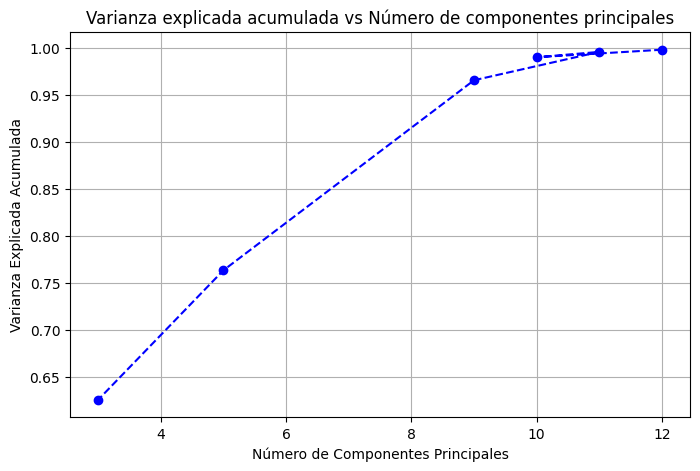

Varianza explicada por cada componente: [0.40397329 0.13137738 0.09052732 0.07017241 0.06734728 0.05677443
 0.05312185 0.04983016 0.04214249]
Varianza total explicada: 0.965266613748218
Pesos de las variables en cada componente principal:
      alpha     delta         u         g         r         i         z  \
0 -0.003185  0.007831  0.268543  0.341978  0.366130  0.362318  0.350206   
1 -0.076078 -0.373665 -0.050305 -0.074315 -0.084891 -0.087826 -0.086327   
2  0.310420  0.382435 -0.333259 -0.271845 -0.217749 -0.174101 -0.149908   
3  0.566109  0.025734  0.331631  0.205492  0.092800  0.018524 -0.019684   
4 -0.225972 -0.059650 -0.088484 -0.074682 -0.062574 -0.052544 -0.046859   
5  0.295012 -0.199173 -0.278627 -0.133948  0.044942  0.164274  0.220513   
6  0.472886 -0.001141 -0.016033 -0.024053 -0.025691 -0.020962 -0.019811   
7  0.395300  0.184457  0.056681  0.035374 -0.002666 -0.029119 -0.043270   
8 -0.241523  0.792264  0.095719  0.061039  0.045144  0.040989  0.034119   

   redshif

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar los datos limpios
data = data_cleaned  # Asegúrate de que data_cleaned esté definido previamente

# Crear DataFrame
df = pd.DataFrame(data)

# Selección de las columnas relevantes para PCA
columns_to_use = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift','obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID']
X = df[columns_to_use]

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA con diferentes números de componentes para evaluar varianza explicada
explained_variance_ratios = []
components_to_test = [12, 10, 11, 9, 5, 3]  # Consideramos componentes hasta el total de columnas relevantes

for n_components in components_to_test:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    explained_variance_ratios.append((n_components, np.sum(pca.explained_variance_ratio_)))

# Visualización de la varianza explicada acumulada
n_components, variance_ratios = zip(*explained_variance_ratios)
plt.figure(figsize=(8, 5))
plt.plot(n_components, variance_ratios, marker='o', linestyle='--', color='b')
plt.title('Varianza explicada acumulada vs Número de componentes principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid()
plt.show()

optimal_pca = PCA(n_components=9)
X_optimal = optimal_pca.fit_transform(X_scaled)

# Verificar la varianza explicada por cada componente
print("Varianza explicada por cada componente:", optimal_pca.explained_variance_ratio_)
print("Varianza total explicada:", np.sum(optimal_pca.explained_variance_ratio_))

# Analizar los pesos de las variables en cada componente principal
pca_components = pd.DataFrame(optimal_pca.components_, columns=columns_to_use)
print("Pesos de las variables en cada componente principal:")
print(pca_components)

# Crear un DataFrame con los datos transformados
columns_pca = [f'PC{i+1}' for i in range(X_optimal.shape[1])]
df_pca = pd.DataFrame(X_optimal, columns=columns_pca)

# Mostrar los primeros datos transformados
print("Datos transformados con PCA:")
print(df_pca.head())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Matriz de Confusión en el pliegue 1:
[[286   1  11]
 [  5  84   5]
 [ 50   1  57]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       298
           1       0.98      0.89      0.93        94
           2       0.78      0.53      0.63       108

    accuracy                           0.85       500
   macro avg       0.87      0.79      0.82       500
weighted avg       0.85      0.85      0.85       500



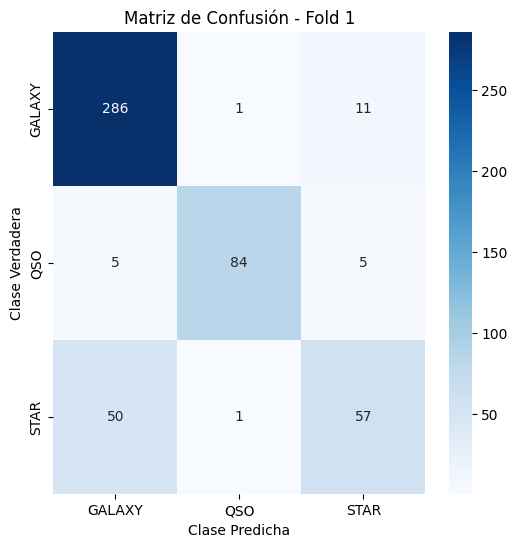

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Matriz de Confusión en el pliegue 2:
[[290   1   7]
 [ 13  79   2]
 [ 45   0  63]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       298
           1       0.99      0.84      0.91        94
           2       0.88      0.58      0.70       108

    accuracy                           0.86       500
   macro avg       0.90      0.80      0.84       500
weighted avg       0.87      0.86      0.86       500



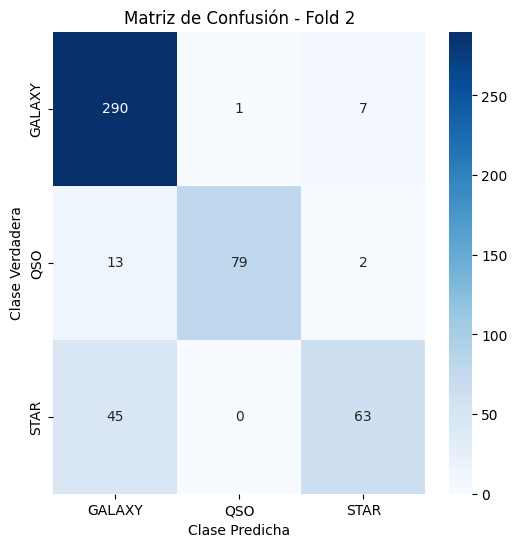

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Matriz de Confusión en el pliegue 3:
[[288   2   8]
 [ 10  82   2]
 [ 39   0  69]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       298
           1       0.98      0.87      0.92        94
           2       0.87      0.64      0.74       108

    accuracy                           0.88       500
   macro avg       0.90      0.83      0.86       500
weighted avg       0.88      0.88      0.87       500



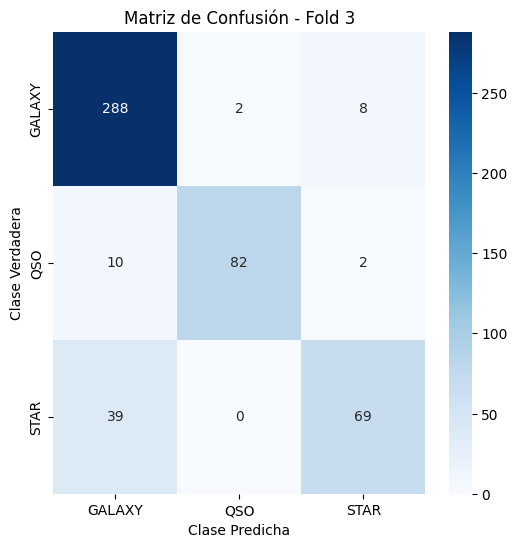

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 4:
[[281   1  16]
 [  3  85   6]
 [ 35   3  70]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       298
           1       0.96      0.90      0.93        94
           2       0.76      0.65      0.70       108

    accuracy                           0.87       500
   macro avg       0.87      0.83      0.85       500
weighted avg       0.87      0.87      0.87       500



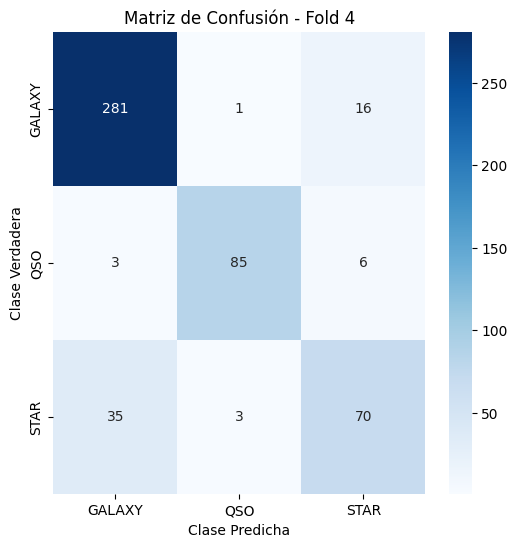

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 5:
[[291   0   7]
 [  8  84   2]
 [ 40   2  66]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       298
           1       0.98      0.89      0.93        94
           2       0.88      0.61      0.72       108

    accuracy                           0.88       500
   macro avg       0.91      0.83      0.86       500
weighted avg       0.89      0.88      0.88       500



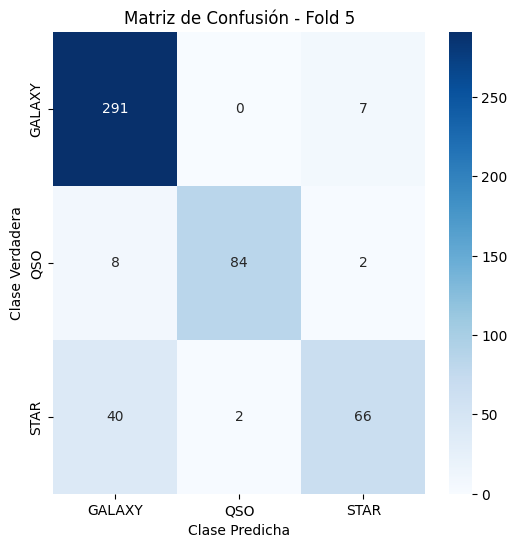

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 6:
[[287   2   9]
 [  6  81   7]
 [ 37   0  71]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       298
           1       0.98      0.86      0.92        94
           2       0.82      0.66      0.73       108

    accuracy                           0.88       500
   macro avg       0.89      0.83      0.85       500
weighted avg       0.88      0.88      0.87       500



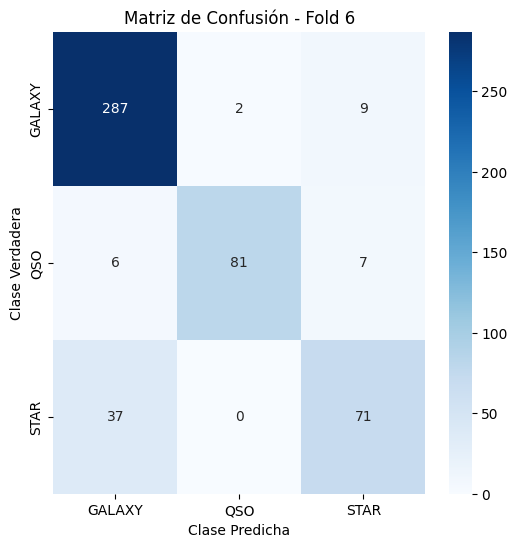

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 7:
[[280   3  15]
 [  2  85   7]
 [ 19   3  86]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       298
           1       0.93      0.90      0.92        94
           2       0.80      0.80      0.80       108

    accuracy                           0.90       500
   macro avg       0.89      0.88      0.88       500
weighted avg       0.90      0.90      0.90       500



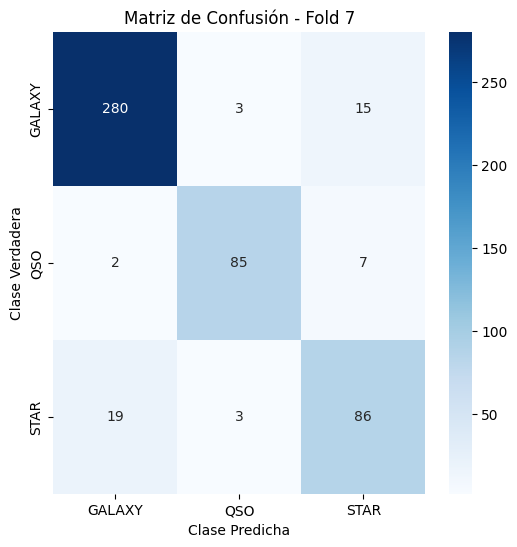

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 8:
[[289   2   7]
 [ 10  82   2]
 [ 30   1  77]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       298
           1       0.96      0.87      0.92        94
           2       0.90      0.71      0.79       108

    accuracy                           0.90       500
   macro avg       0.91      0.85      0.88       500
weighted avg       0.90      0.90      0.89       500



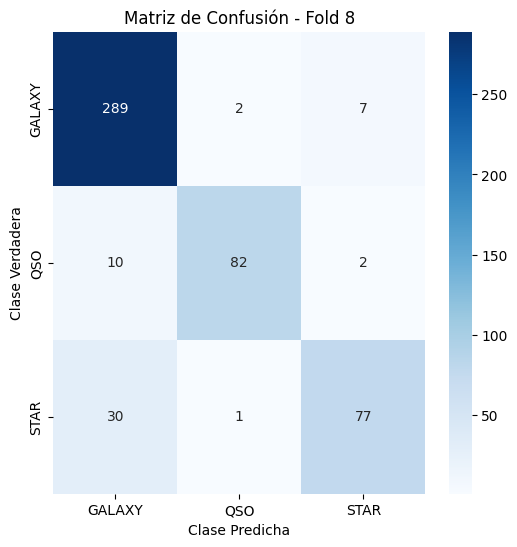

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 9:
[[282   6  10]
 [  7  83   4]
 [ 34   4  70]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       298
           1       0.89      0.88      0.89        94
           2       0.83      0.65      0.73       108

    accuracy                           0.87       500
   macro avg       0.87      0.83      0.84       500
weighted avg       0.87      0.87      0.87       500



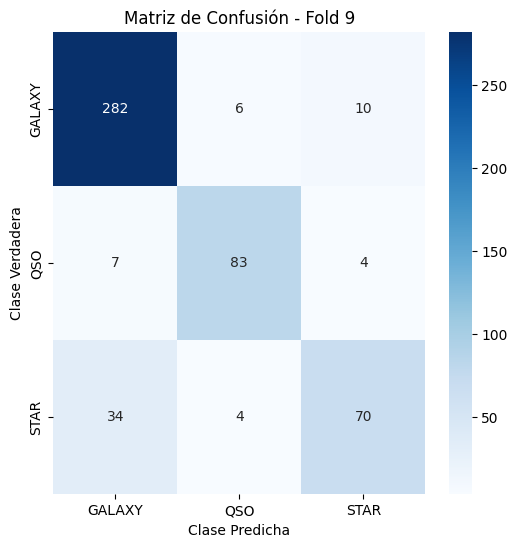

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 10:
[[292   3   3]
 [ 10  79   5]
 [ 34   0  74]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       298
           1       0.96      0.84      0.90        94
           2       0.90      0.69      0.78       108

    accuracy                           0.89       500
   macro avg       0.91      0.84      0.87       500
weighted avg       0.89      0.89      0.89       500



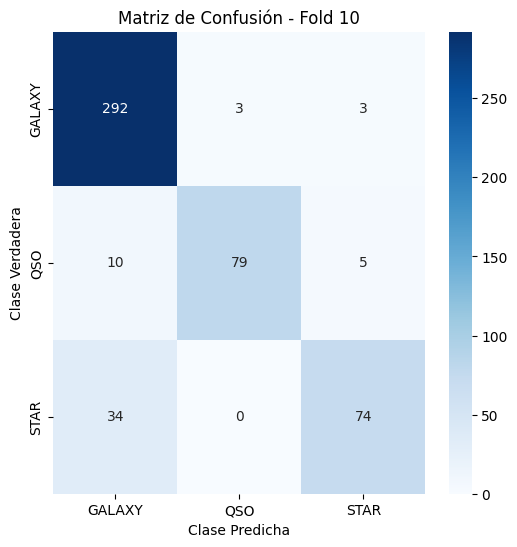

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 11:
[[283   2  13]
 [  7  85   2]
 [ 29   0  79]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       298
           1       0.98      0.90      0.94        94
           2       0.84      0.73      0.78       108

    accuracy                           0.89       500
   macro avg       0.90      0.86      0.88       500
weighted avg       0.89      0.89      0.89       500



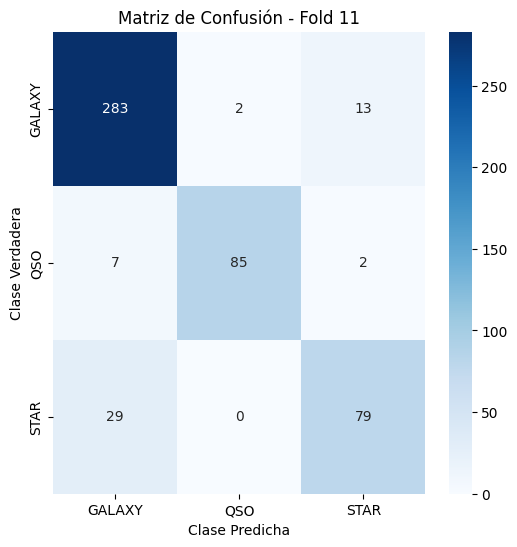

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 12:
[[286   4   8]
 [  6  86   2]
 [ 37   1  70]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       298
           1       0.95      0.91      0.93        94
           2       0.88      0.65      0.74       108

    accuracy                           0.88       500
   macro avg       0.90      0.84      0.86       500
weighted avg       0.88      0.88      0.88       500



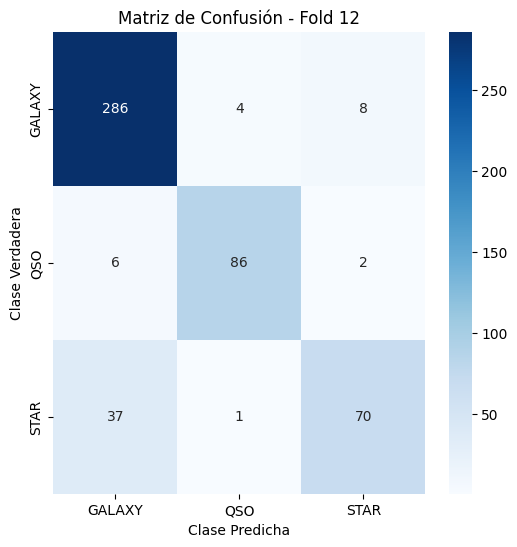

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 13:
[[283   2  13]
 [  5  84   5]
 [ 33   0  75]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       298
           1       0.98      0.89      0.93        94
           2       0.81      0.69      0.75       108

    accuracy                           0.88       500
   macro avg       0.89      0.85      0.86       500
weighted avg       0.88      0.88      0.88       500



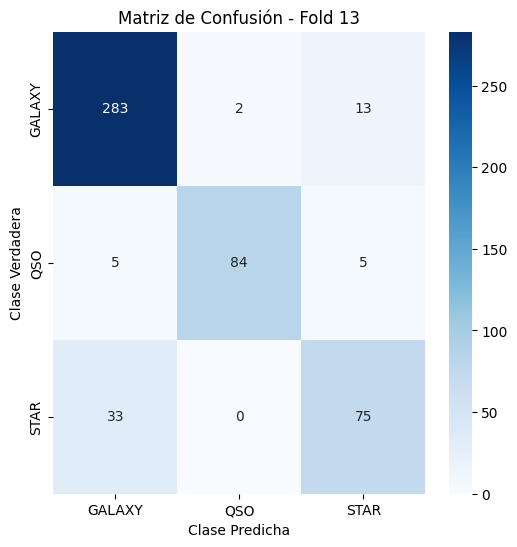

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 14:
[[288   2   8]
 [  7  83   4]
 [ 33   0  75]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       298
           1       0.98      0.88      0.93        94
           2       0.86      0.69      0.77       108

    accuracy                           0.89       500
   macro avg       0.91      0.85      0.87       500
weighted avg       0.89      0.89      0.89       500



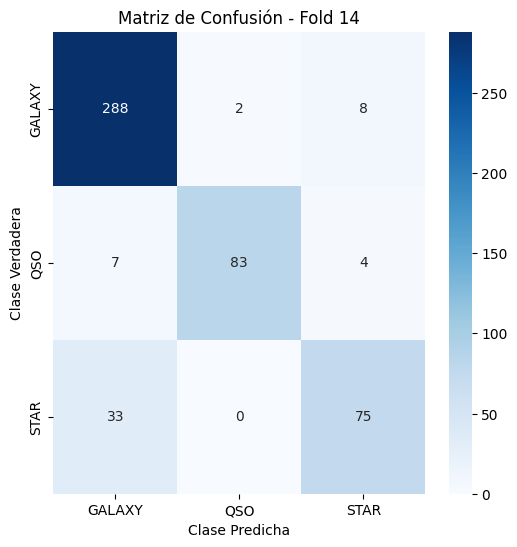

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 15:
[[283   1  14]
 [ 12  79   3]
 [ 29   0  79]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       298
           1       0.99      0.84      0.91        94
           2       0.82      0.73      0.77       108

    accuracy                           0.88       500
   macro avg       0.89      0.84      0.86       500
weighted avg       0.88      0.88      0.88       500



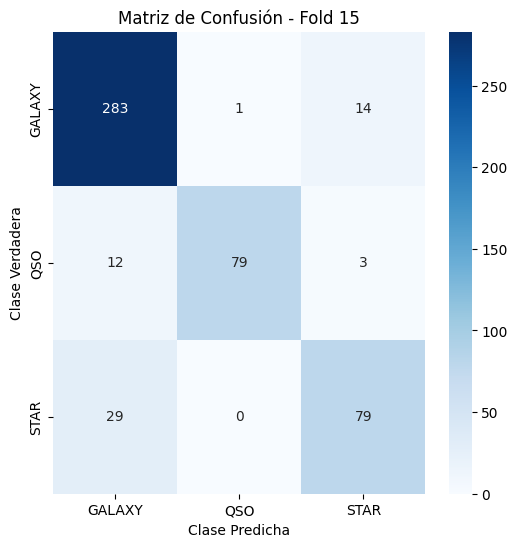

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de Confusión en el pliegue 16:
[[278   4  16]
 [  6  84   4]
 [ 25   0  83]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       298
           1       0.95      0.89      0.92        94
           2       0.81      0.77      0.79       108

    accuracy                           0.89       500
   macro avg       0.89      0.87      0.88       500
weighted avg       0.89      0.89      0.89       500



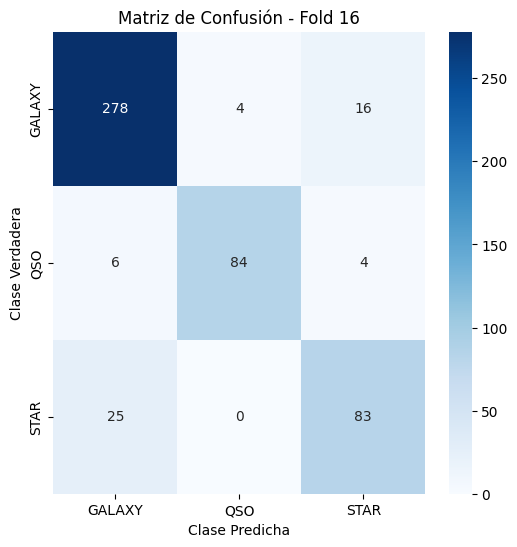

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 17:
[[287   2   9]
 [  3  88   3]
 [ 44   1  63]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       298
           1       0.97      0.94      0.95        94
           2       0.84      0.58      0.69       108

    accuracy                           0.88       500
   macro avg       0.89      0.83      0.85       500
weighted avg       0.88      0.88      0.87       500



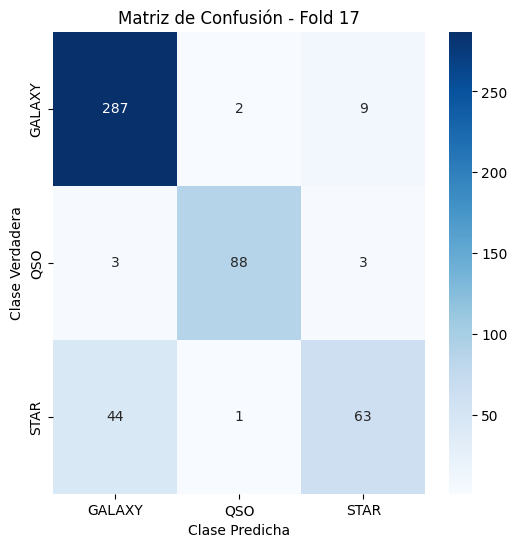

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 18:
[[278   6  14]
 [  5  88   1]
 [ 31   1  76]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       298
           1       0.93      0.94      0.93        94
           2       0.84      0.70      0.76       108

    accuracy                           0.88       500
   macro avg       0.88      0.86      0.87       500
weighted avg       0.88      0.88      0.88       500



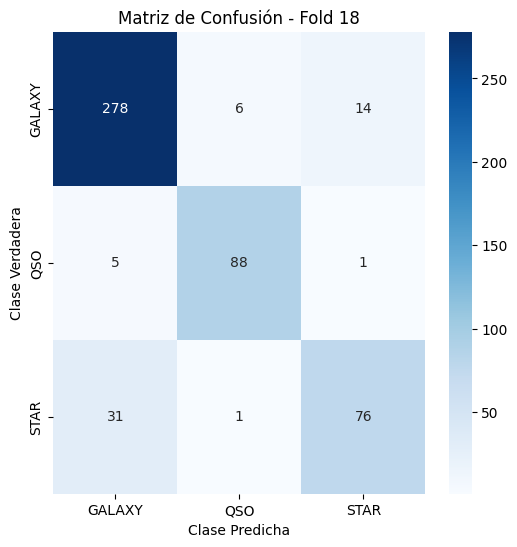

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 19:
[[285   1  12]
 [  4  87   3]
 [ 20   1  87]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       298
           1       0.98      0.93      0.95        94
           2       0.85      0.81      0.83       108

    accuracy                           0.92       500
   macro avg       0.92      0.90      0.91       500
weighted avg       0.92      0.92      0.92       500



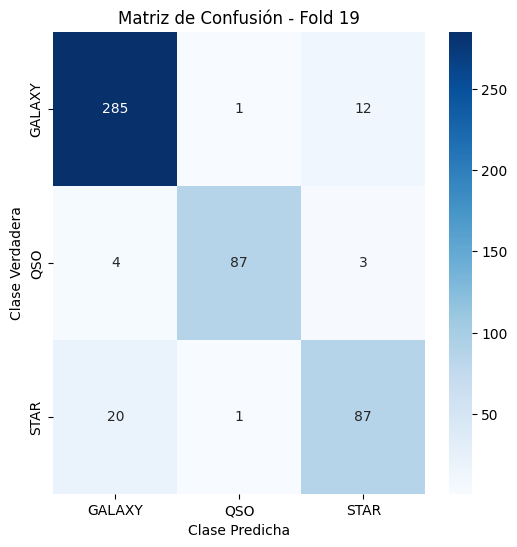

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de Confusión en el pliegue 20:
[[287   4   6]
 [  7  86   2]
 [ 32   4  72]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       297
           1       0.91      0.91      0.91        95
           2       0.90      0.67      0.77       108

    accuracy                           0.89       500
   macro avg       0.90      0.85      0.87       500
weighted avg       0.89      0.89      0.89       500



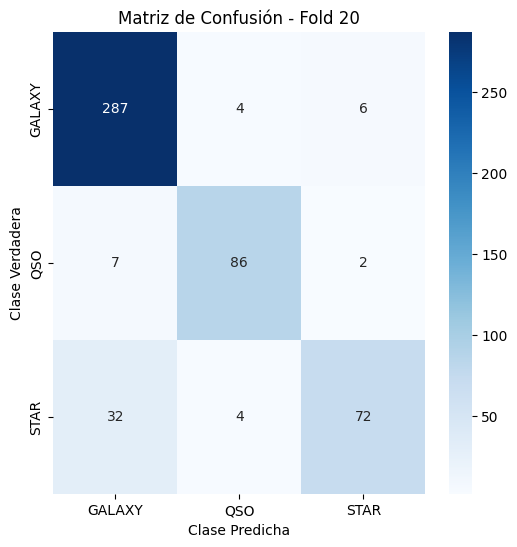

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 21:
[[290   2   5]
 [  4  87   4]
 [ 29   1  78]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       297
           1       0.97      0.92      0.94        95
           2       0.90      0.72      0.80       108

    accuracy                           0.91       500
   macro avg       0.92      0.87      0.89       500
weighted avg       0.91      0.91      0.91       500



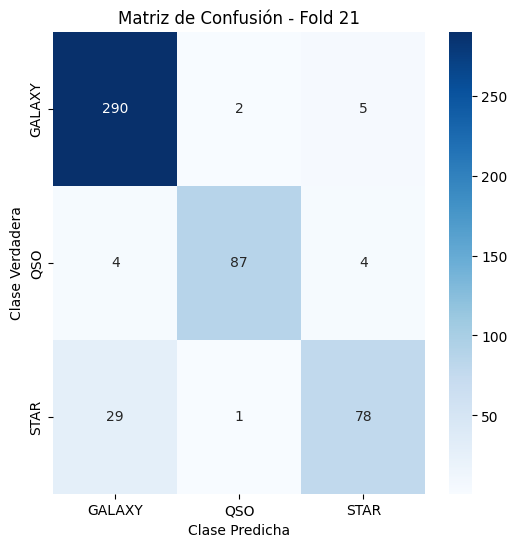

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 22:
[[282   8   7]
 [  7  86   2]
 [ 17   0  91]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       297
           1       0.91      0.91      0.91        95
           2       0.91      0.84      0.88       108

    accuracy                           0.92       500
   macro avg       0.92      0.90      0.91       500
weighted avg       0.92      0.92      0.92       500



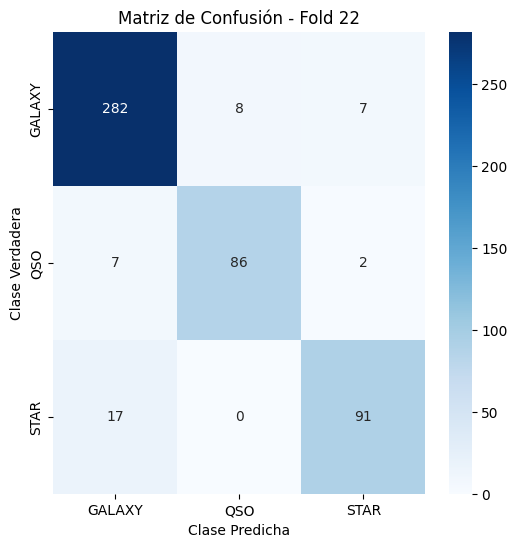

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 23:
[[280   3  14]
 [ 13  80   2]
 [ 17   0  91]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       297
           1       0.96      0.84      0.90        95
           2       0.85      0.84      0.85       108

    accuracy                           0.90       500
   macro avg       0.91      0.88      0.89       500
weighted avg       0.90      0.90      0.90       500



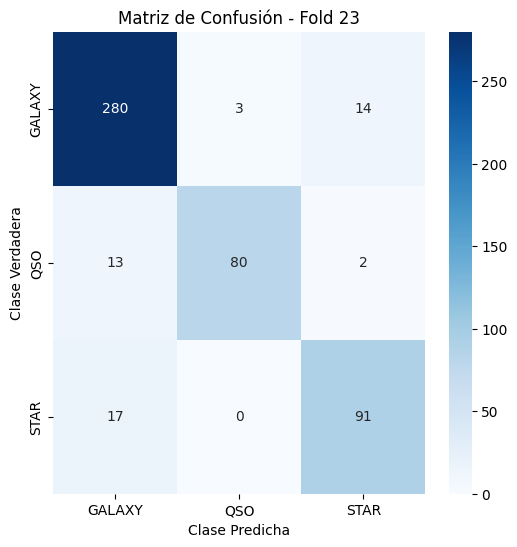

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 24:
[[284   2  11]
 [  7  83   5]
 [ 28   0  80]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       297
           1       0.98      0.87      0.92        95
           2       0.83      0.74      0.78       108

    accuracy                           0.89       500
   macro avg       0.90      0.86      0.88       500
weighted avg       0.89      0.89      0.89       500



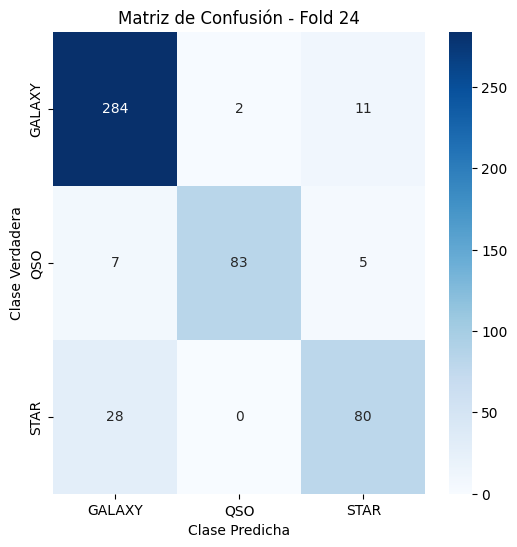

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de Confusión en el pliegue 25:
[[282   2  13]
 [  5  89   1]
 [ 33   1  74]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       297
           1       0.97      0.94      0.95        95
           2       0.84      0.69      0.76       108

    accuracy                           0.89       500
   macro avg       0.90      0.86      0.87       500
weighted avg       0.89      0.89      0.89       500



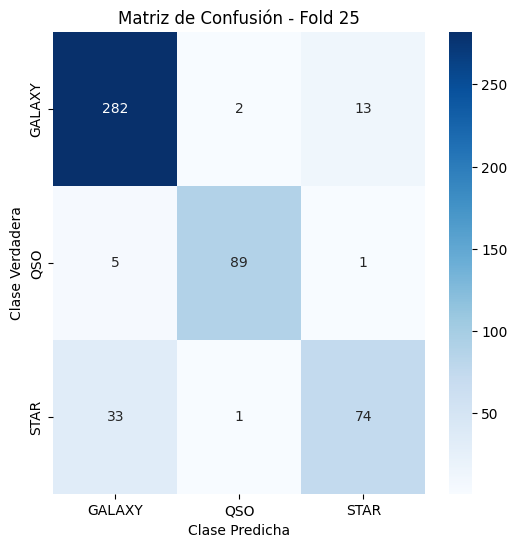

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 26:
[[290   2   5]
 [  7  85   3]
 [ 39   0  69]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       297
           1       0.98      0.89      0.93        95
           2       0.90      0.64      0.75       108

    accuracy                           0.89       500
   macro avg       0.91      0.84      0.87       500
weighted avg       0.89      0.89      0.88       500



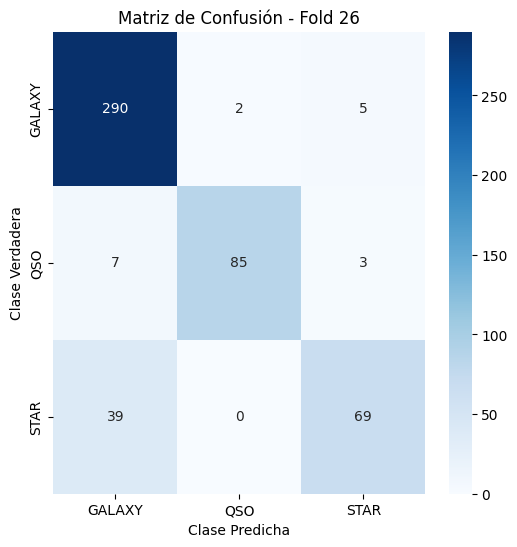

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 27:
[[281   4  12]
 [  4  86   5]
 [ 30   1  77]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       297
           1       0.95      0.91      0.92        95
           2       0.82      0.71      0.76       108

    accuracy                           0.89       500
   macro avg       0.89      0.85      0.87       500
weighted avg       0.89      0.89      0.89       500



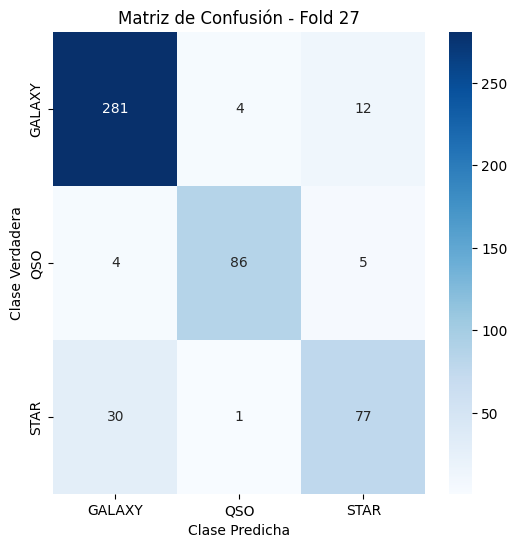

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 28:
[[282   3  12]
 [  5  85   5]
 [ 28   0  80]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       297
           1       0.97      0.89      0.93        95
           2       0.82      0.74      0.78       108

    accuracy                           0.89       500
   macro avg       0.90      0.86      0.88       500
weighted avg       0.89      0.89      0.89       500



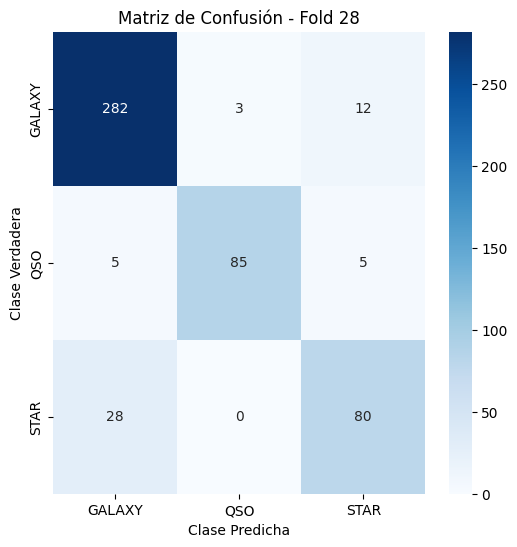

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 29:
[[277   6  14]
 [  6  86   3]
 [ 33   1  74]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       297
           1       0.92      0.91      0.91        95
           2       0.81      0.69      0.74       108

    accuracy                           0.87       500
   macro avg       0.87      0.84      0.85       500
weighted avg       0.87      0.87      0.87       500



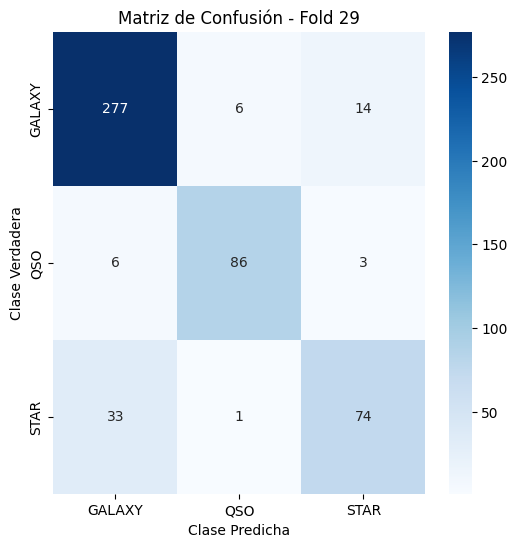

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de Confusión en el pliegue 30:
[[288   2   7]
 [  4  88   3]
 [ 26   1  81]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       297
           1       0.97      0.93      0.95        95
           2       0.89      0.75      0.81       108

    accuracy                           0.91       500
   macro avg       0.92      0.88      0.90       500
weighted avg       0.91      0.91      0.91       500



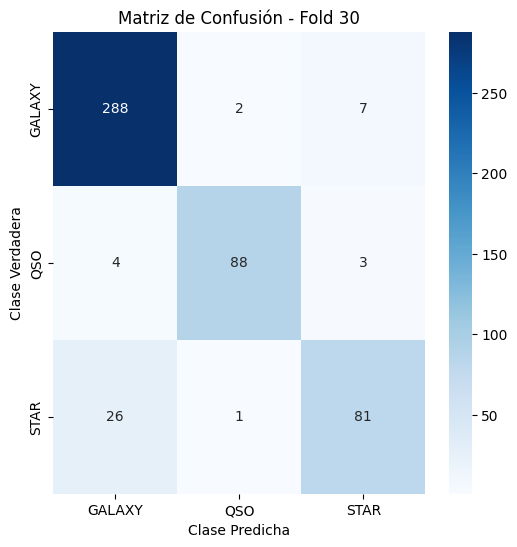

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 31:
[[281   5  11]
 [  7  83   5]
 [ 20   3  85]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       297
           1       0.91      0.87      0.89        95
           2       0.84      0.79      0.81       108

    accuracy                           0.90       500
   macro avg       0.89      0.87      0.88       500
weighted avg       0.90      0.90      0.90       500



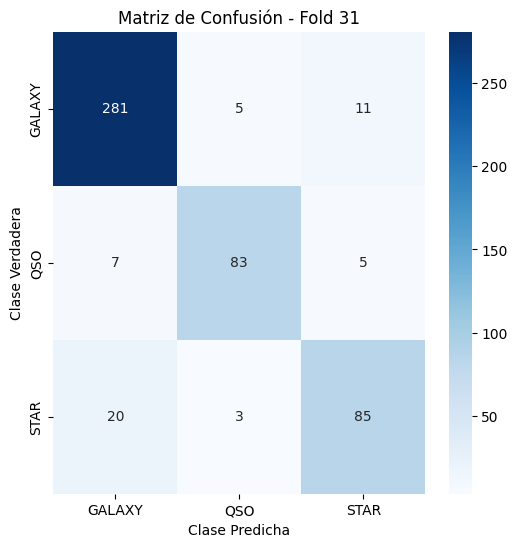

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 32:
[[285   2  10]
 [  6  85   4]
 [ 23   1  84]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       297
           1       0.97      0.89      0.93        95
           2       0.86      0.78      0.82       108

    accuracy                           0.91       500
   macro avg       0.91      0.88      0.89       500
weighted avg       0.91      0.91      0.91       500



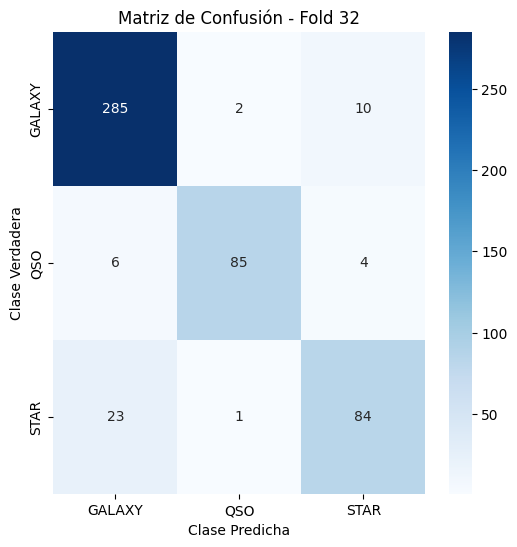

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 33:
[[282   4  11]
 [  7  84   4]
 [ 23   3  82]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       297
           1       0.92      0.88      0.90        95
           2       0.85      0.76      0.80       108

    accuracy                           0.90       500
   macro avg       0.89      0.86      0.88       500
weighted avg       0.89      0.90      0.89       500



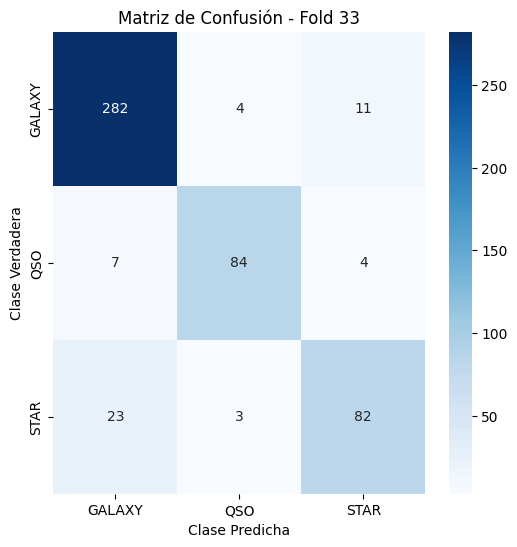

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 34:
[[283   5   9]
 [  9  81   5]
 [ 22   4  82]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       297
           1       0.90      0.85      0.88        95
           2       0.85      0.76      0.80       108

    accuracy                           0.89       500
   macro avg       0.89      0.85      0.87       500
weighted avg       0.89      0.89      0.89       500



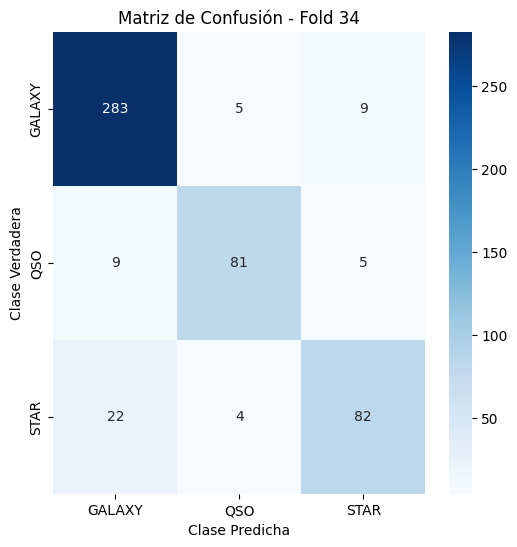

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 35:
[[284   5   8]
 [  6  87   2]
 [ 12   1  95]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       297
           1       0.94      0.92      0.93        95
           2       0.90      0.88      0.89       108

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.92       500
weighted avg       0.93      0.93      0.93       500



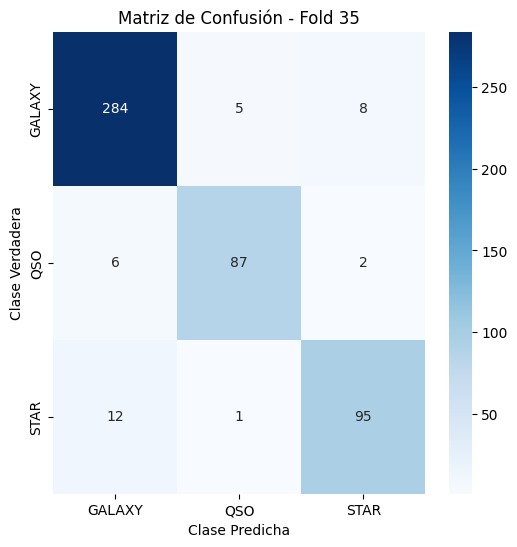

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 36:
[[281   3  13]
 [  8  80   7]
 [ 25   1  82]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       297
           1       0.95      0.84      0.89        95
           2       0.80      0.76      0.78       108

    accuracy                           0.89       500
   macro avg       0.88      0.85      0.86       500
weighted avg       0.89      0.89      0.88       500



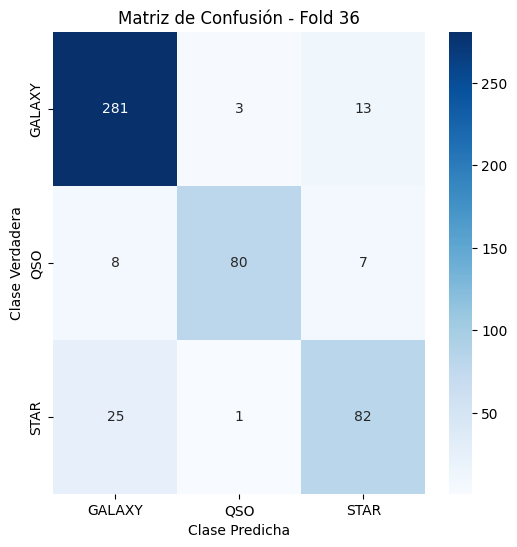

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 37:
[[287   4   6]
 [  6  86   3]
 [ 23   1  84]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       297
           1       0.95      0.91      0.92        95
           2       0.90      0.78      0.84       108

    accuracy                           0.91       500
   macro avg       0.92      0.88      0.90       500
weighted avg       0.91      0.91      0.91       500



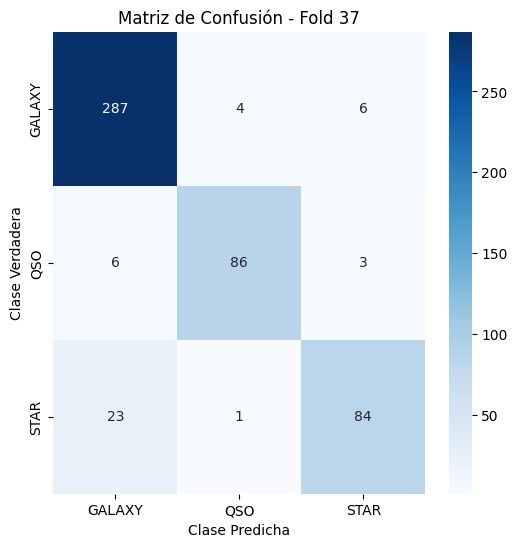

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 38:
[[285   3   9]
 [  3  91   1]
 [ 27   0  81]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       297
           1       0.97      0.96      0.96        95
           2       0.89      0.75      0.81       108

    accuracy                           0.91       500
   macro avg       0.92      0.89      0.90       500
weighted avg       0.91      0.91      0.91       500



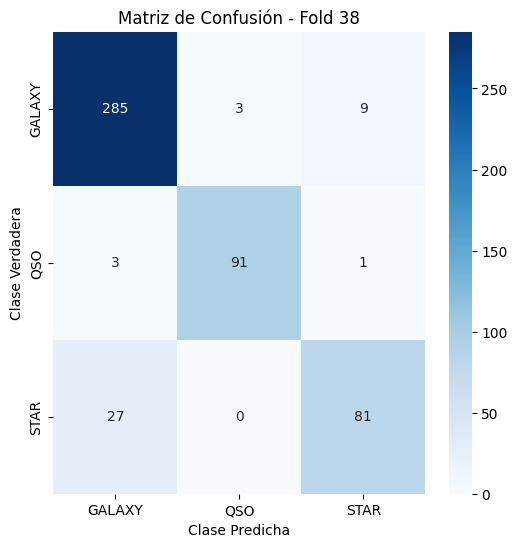

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 39:
[[280   2  15]
 [  6  84   5]
 [ 26   1  81]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       297
           1       0.97      0.88      0.92        95
           2       0.80      0.75      0.78       108

    accuracy                           0.89       500
   macro avg       0.89      0.86      0.87       500
weighted avg       0.89      0.89      0.89       500



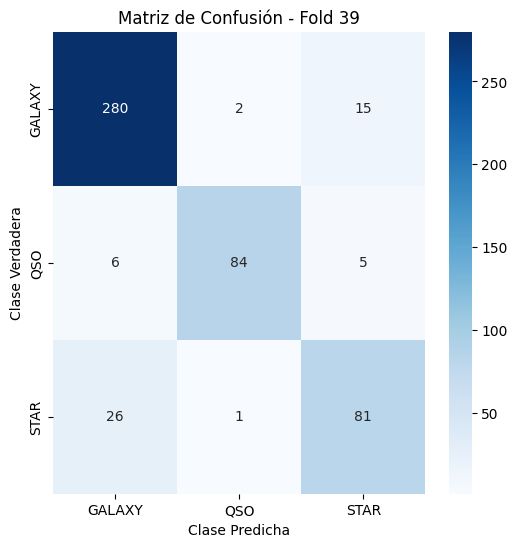

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 40:
[[283   1  13]
 [ 11  79   5]
 [ 27   2  79]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       297
           1       0.96      0.83      0.89        95
           2       0.81      0.73      0.77       108

    accuracy                           0.88       500
   macro avg       0.89      0.84      0.86       500
weighted avg       0.88      0.88      0.88       500



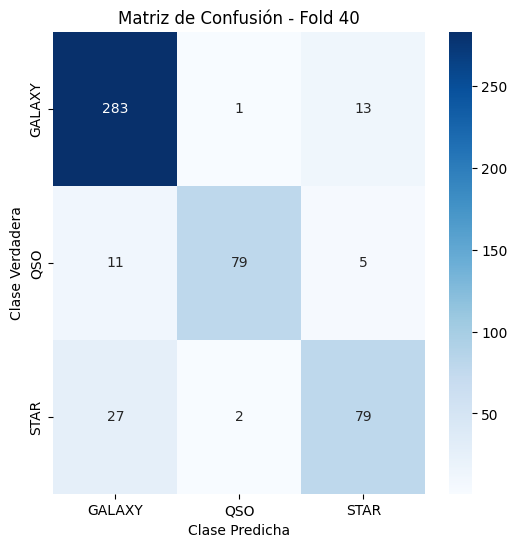

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de Confusión en el pliegue 41:
[[281   5  11]
 [  8  85   2]
 [ 28   0  80]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       297
           1       0.94      0.89      0.92        95
           2       0.86      0.74      0.80       108

    accuracy                           0.89       500
   macro avg       0.90      0.86      0.88       500
weighted avg       0.89      0.89      0.89       500



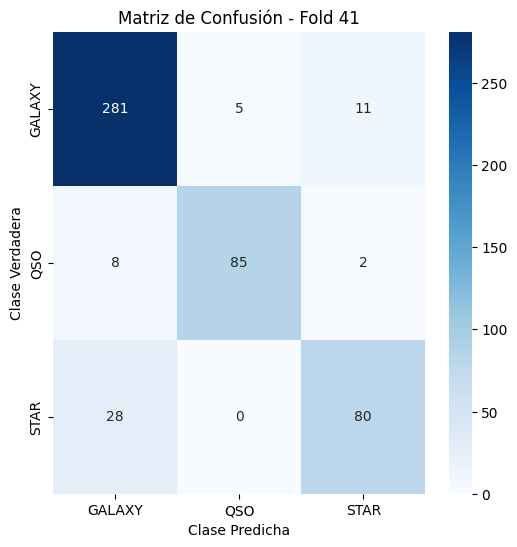

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 42:
[[283   2  12]
 [  6  85   4]
 [ 24   0  84]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       297
           1       0.98      0.89      0.93        95
           2       0.84      0.78      0.81       108

    accuracy                           0.90       500
   macro avg       0.91      0.88      0.89       500
weighted avg       0.90      0.90      0.90       500



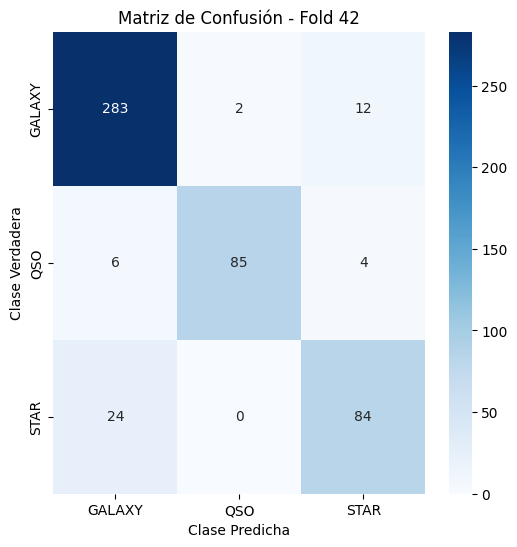

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 43:
[[283   3  11]
 [  7  82   6]
 [ 24   1  83]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       297
           1       0.95      0.86      0.91        95
           2       0.83      0.77      0.80       108

    accuracy                           0.90       500
   macro avg       0.89      0.86      0.88       500
weighted avg       0.90      0.90      0.89       500



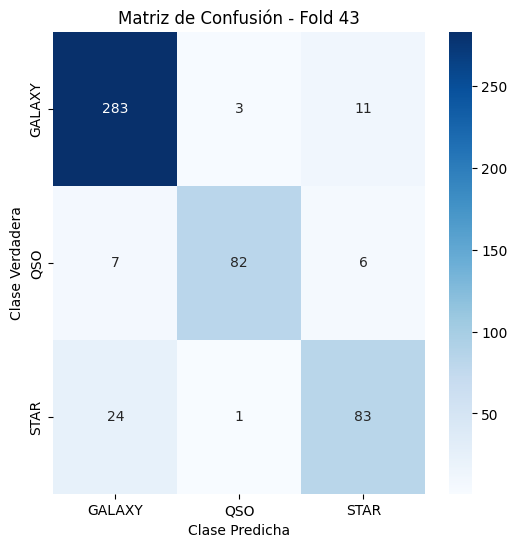

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 44:
[[285   4   8]
 [  3  90   2]
 [ 29   1  78]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       297
           1       0.95      0.95      0.95        95
           2       0.89      0.72      0.80       108

    accuracy                           0.91       500
   macro avg       0.91      0.88      0.89       500
weighted avg       0.91      0.91      0.90       500



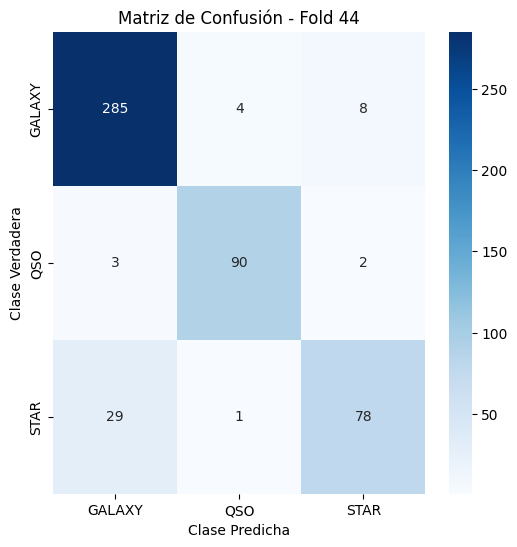

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 45:
[[275   1  21]
 [  7  80   8]
 [ 18   2  88]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       297
           1       0.96      0.84      0.90        95
           2       0.75      0.81      0.78       108

    accuracy                           0.89       500
   macro avg       0.88      0.86      0.87       500
weighted avg       0.89      0.89      0.89       500



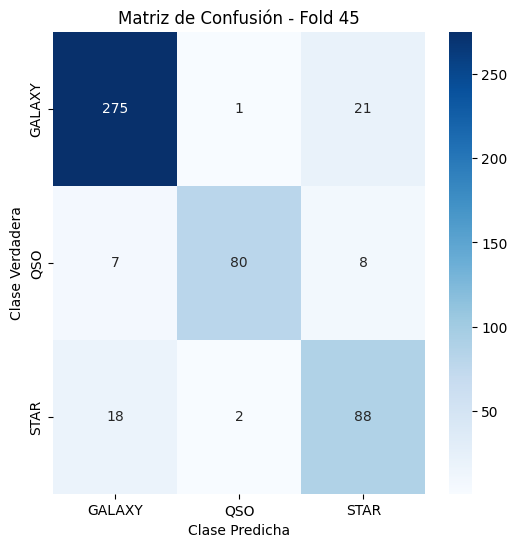

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 46:
[[291   1   5]
 [ 11  80   4]
 [ 25   2  81]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       297
           1       0.96      0.84      0.90        95
           2       0.90      0.75      0.82       108

    accuracy                           0.90       500
   macro avg       0.92      0.86      0.88       500
weighted avg       0.91      0.90      0.90       500



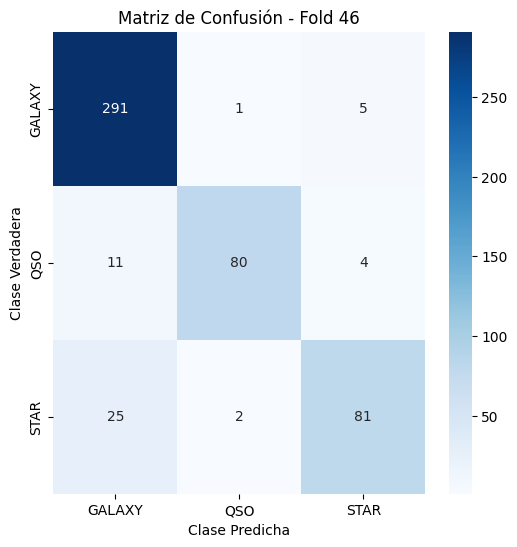

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de Confusión en el pliegue 47:
[[278   5  14]
 [ 11  79   5]
 [ 24   0  84]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       297
           1       0.94      0.83      0.88        95
           2       0.82      0.78      0.80       108

    accuracy                           0.88       500
   macro avg       0.88      0.85      0.86       500
weighted avg       0.88      0.88      0.88       500



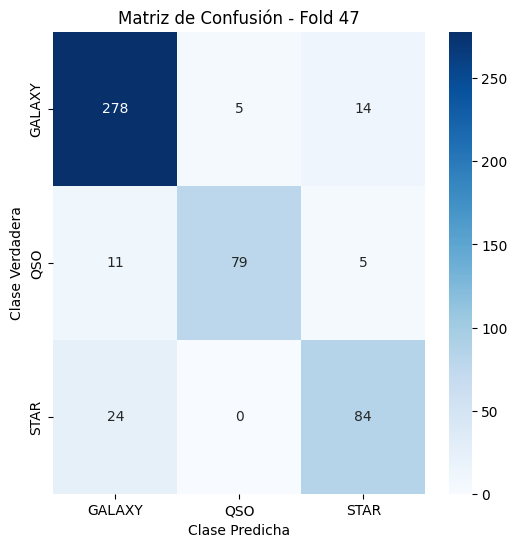

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 48:
[[288   4   5]
 [  7  84   4]
 [ 24   3  81]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       297
           1       0.92      0.88      0.90        95
           2       0.90      0.75      0.82       108

    accuracy                           0.91       500
   macro avg       0.91      0.87      0.89       500
weighted avg       0.91      0.91      0.90       500



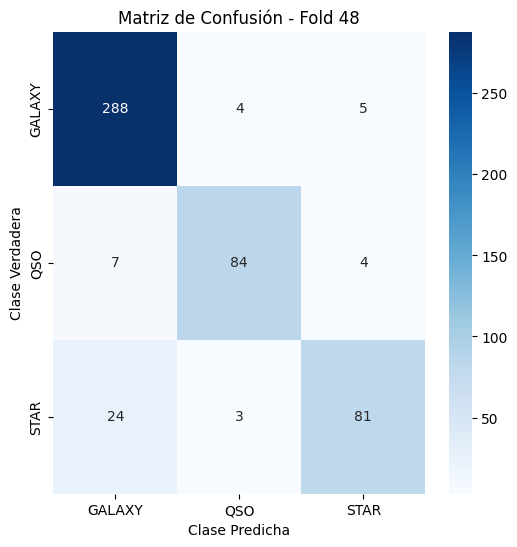

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 49:
[[286   5   6]
 [  8  85   2]
 [ 28   2  78]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       297
           1       0.92      0.89      0.91        95
           2       0.91      0.72      0.80       108

    accuracy                           0.90       500
   macro avg       0.91      0.86      0.88       500
weighted avg       0.90      0.90      0.90       500



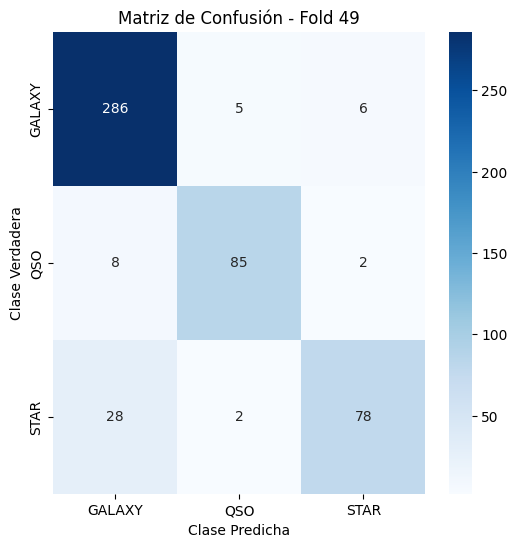

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 50:
[[290   2   5]
 [  9  82   4]
 [ 29   1  78]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       297
           1       0.96      0.86      0.91        95
           2       0.90      0.72      0.80       108

    accuracy                           0.90       500
   macro avg       0.92      0.85      0.88       500
weighted avg       0.90      0.90      0.90       500



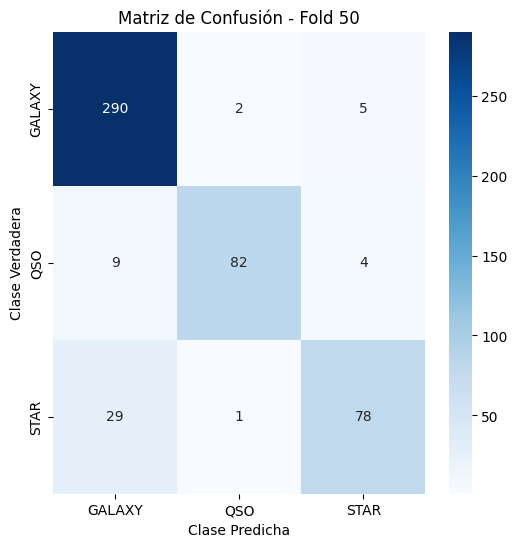

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 51:
[[282   5  10]
 [  8  84   3]
 [ 29   1  78]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       297
           1       0.93      0.88      0.91        95
           2       0.86      0.72      0.78       108

    accuracy                           0.89       500
   macro avg       0.89      0.85      0.87       500
weighted avg       0.89      0.89      0.89       500



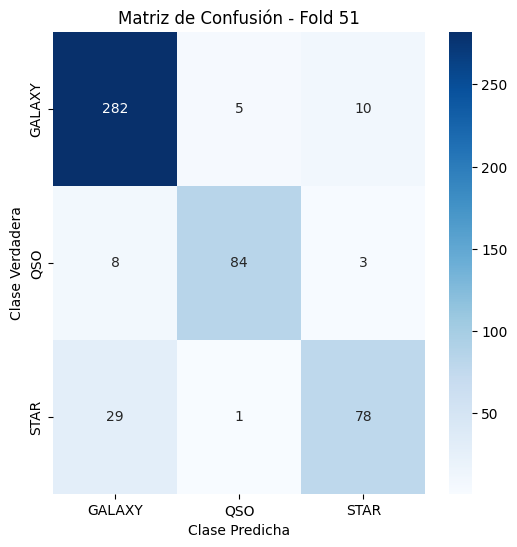

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de Confusión en el pliegue 52:
[[287   4   6]
 [ 14  78   3]
 [ 24   1  83]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       297
           1       0.94      0.82      0.88        95
           2       0.90      0.77      0.83       108

    accuracy                           0.90       500
   macro avg       0.91      0.85      0.88       500
weighted avg       0.90      0.90      0.89       500



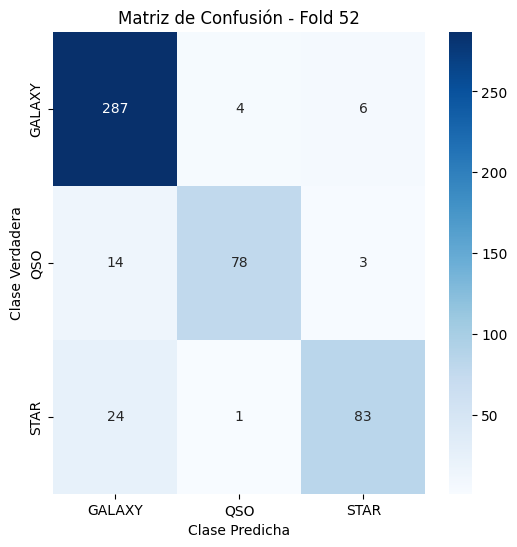

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 53:
[[285   6   6]
 [  7  85   3]
 [ 27   3  78]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       297
           1       0.90      0.89      0.90        95
           2       0.90      0.72      0.80       108

    accuracy                           0.90       500
   macro avg       0.90      0.86      0.87       500
weighted avg       0.90      0.90      0.89       500



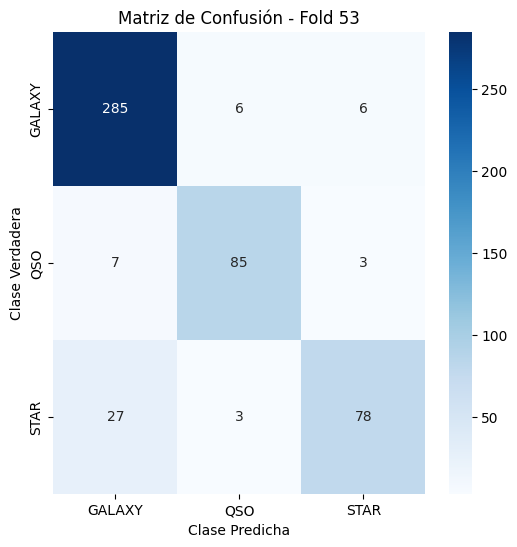

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 54:
[[285   3   9]
 [  9  84   2]
 [ 22   2  84]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       297
           1       0.94      0.88      0.91        95
           2       0.88      0.78      0.83       108

    accuracy                           0.91       500
   macro avg       0.91      0.87      0.89       500
weighted avg       0.91      0.91      0.90       500



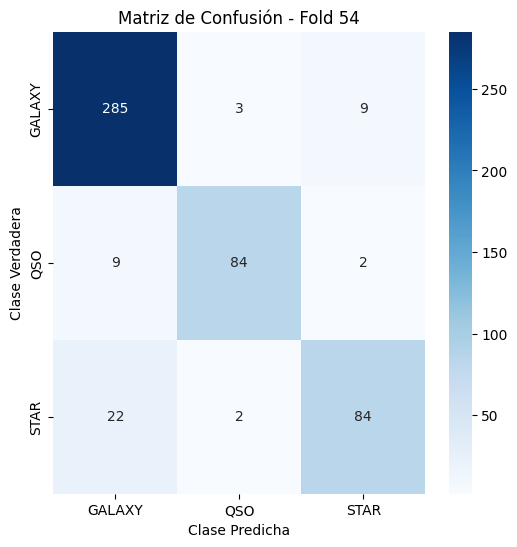

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 55:
[[286   2   9]
 [  6  88   1]
 [ 21   0  87]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       297
           1       0.98      0.93      0.95        95
           2       0.90      0.81      0.85       108

    accuracy                           0.92       500
   macro avg       0.93      0.90      0.91       500
weighted avg       0.92      0.92      0.92       500



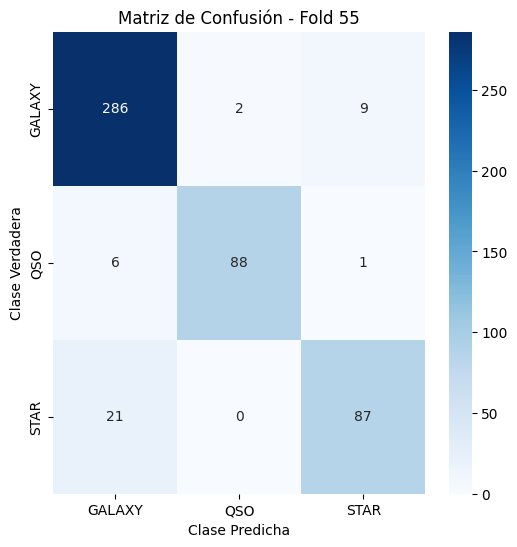

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 56:
[[287   4   6]
 [ 11  81   3]
 [ 23   0  85]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       297
           1       0.95      0.85      0.90        95
           2       0.90      0.79      0.84       108

    accuracy                           0.91       500
   macro avg       0.92      0.87      0.89       500
weighted avg       0.91      0.91      0.90       500



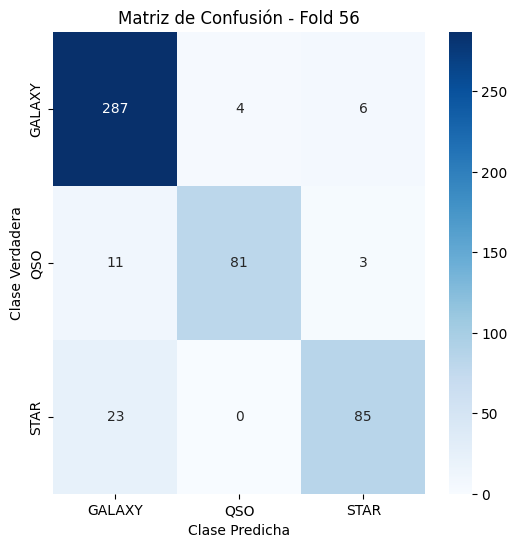

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de Confusión en el pliegue 57:
[[287   2   8]
 [  7  81   7]
 [ 24   1  83]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       297
           1       0.96      0.85      0.91        95
           2       0.85      0.77      0.81       108

    accuracy                           0.90       500
   macro avg       0.90      0.86      0.88       500
weighted avg       0.90      0.90      0.90       500



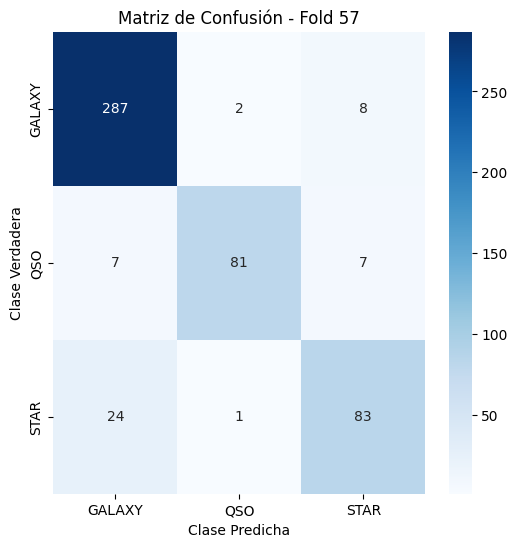

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 58:
[[289   1   7]
 [  4  88   3]
 [ 21   0  87]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       297
           1       0.99      0.93      0.96        95
           2       0.90      0.81      0.85       108

    accuracy                           0.93       500
   macro avg       0.94      0.90      0.92       500
weighted avg       0.93      0.93      0.93       500



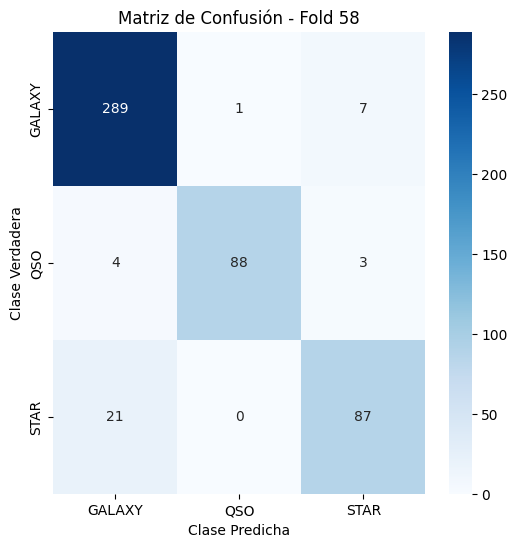

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 59:
[[285   2  10]
 [  6  87   2]
 [ 20   1  87]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       297
           1       0.97      0.92      0.94        95
           2       0.88      0.81      0.84       108

    accuracy                           0.92       500
   macro avg       0.92      0.89      0.91       500
weighted avg       0.92      0.92      0.92       500



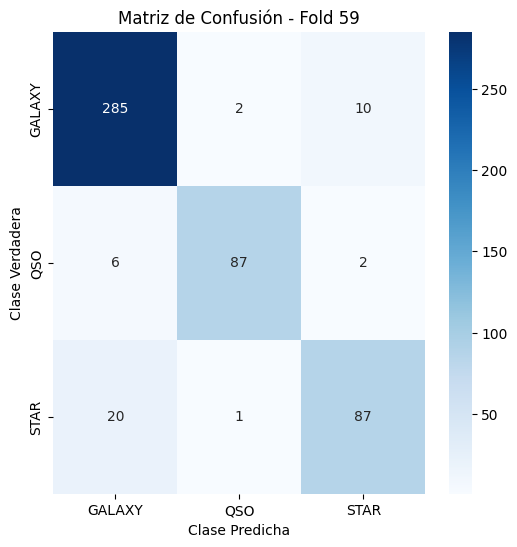

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 60:
[[281   5  11]
 [  9  80   6]
 [ 26   0  82]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       297
           1       0.94      0.84      0.89        95
           2       0.83      0.76      0.79       108

    accuracy                           0.89       500
   macro avg       0.89      0.85      0.87       500
weighted avg       0.89      0.89      0.88       500



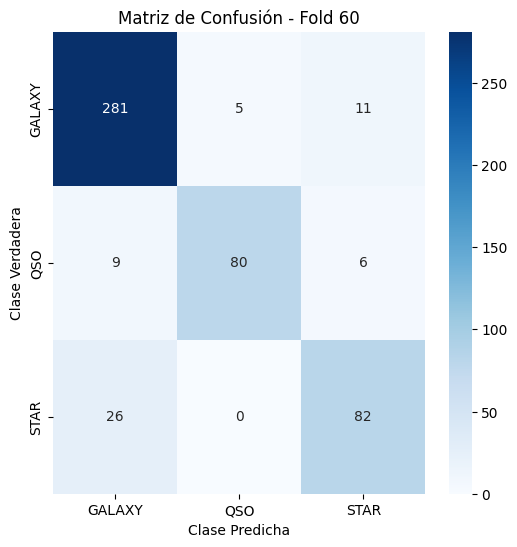

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 61:
[[286   2   9]
 [  6  88   1]
 [ 27   1  80]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       297
           1       0.97      0.93      0.95        95
           2       0.89      0.74      0.81       108

    accuracy                           0.91       500
   macro avg       0.92      0.88      0.89       500
weighted avg       0.91      0.91      0.91       500



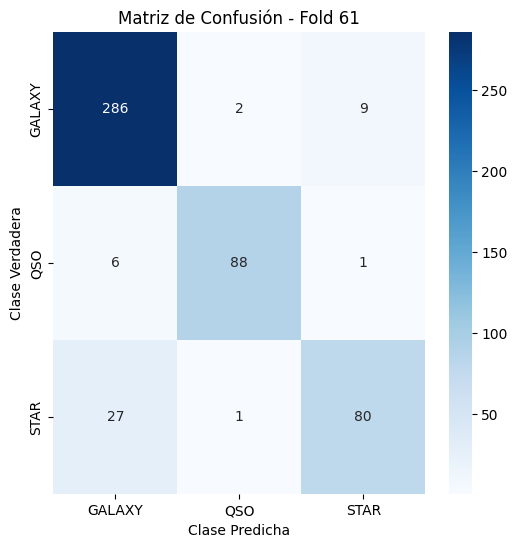

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 62:
[[279   3  15]
 [  7  86   2]
 [ 24   0  84]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       297
           1       0.97      0.91      0.93        95
           2       0.83      0.78      0.80       108

    accuracy                           0.90       500
   macro avg       0.90      0.87      0.89       500
weighted avg       0.90      0.90      0.90       500



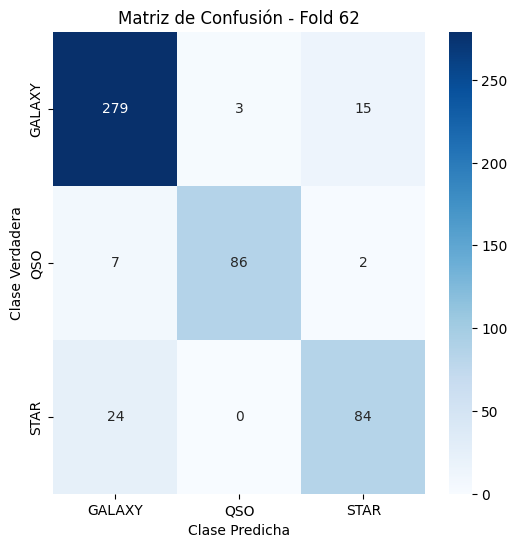

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 63:
[[287   4   6]
 [  7  81   7]
 [ 27   0  81]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       297
           1       0.95      0.85      0.90        95
           2       0.86      0.75      0.80       108

    accuracy                           0.90       500
   macro avg       0.90      0.86      0.88       500
weighted avg       0.90      0.90      0.90       500



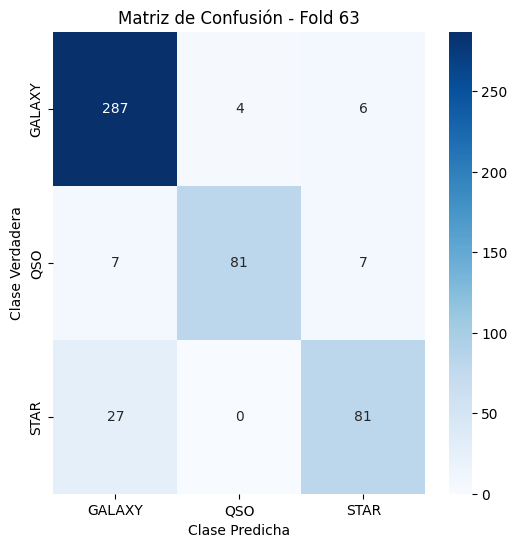

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 64:
[[287   3   7]
 [  9  86   0]
 [ 20   1  87]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       297
           1       0.96      0.91      0.93        95
           2       0.93      0.81      0.86       108

    accuracy                           0.92       500
   macro avg       0.93      0.89      0.91       500
weighted avg       0.92      0.92      0.92       500



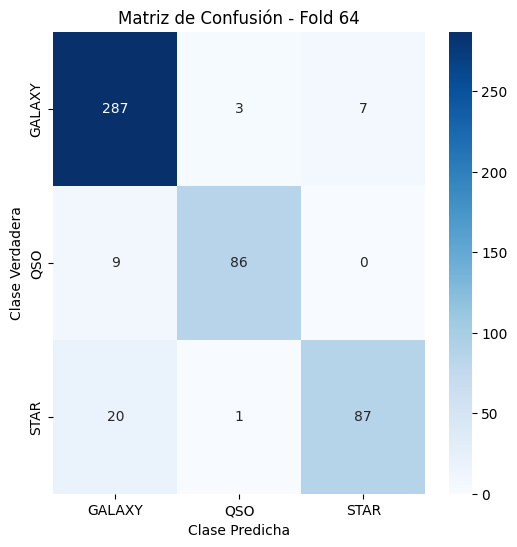

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 65:
[[282   5  10]
 [  3  89   3]
 [ 24   0  84]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       297
           1       0.95      0.94      0.94        95
           2       0.87      0.78      0.82       108

    accuracy                           0.91       500
   macro avg       0.91      0.89      0.90       500
weighted avg       0.91      0.91      0.91       500



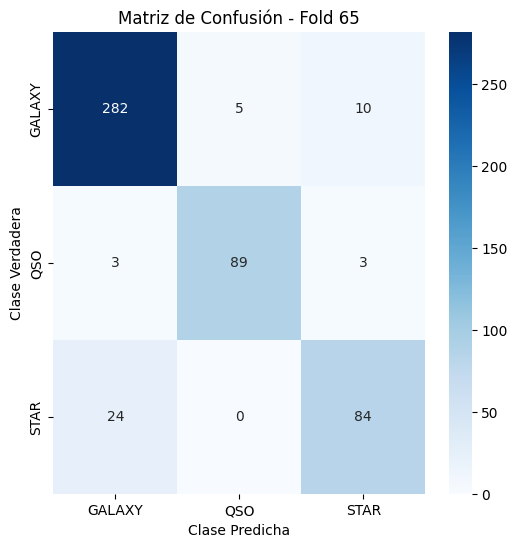

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Matriz de Confusión en el pliegue 66:
[[291   3   3]
 [  4  89   2]
 [ 25   0  83]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       297
           1       0.97      0.94      0.95        95
           2       0.94      0.77      0.85       108

    accuracy                           0.93       500
   macro avg       0.94      0.90      0.91       500
weighted avg       0.93      0.93      0.92       500



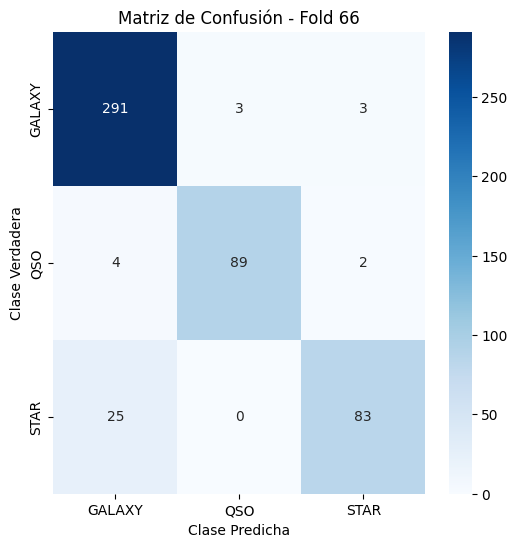

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 67:
[[286   6   5]
 [  7  82   6]
 [ 10   3  95]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       297
           1       0.90      0.86      0.88        95
           2       0.90      0.88      0.89       108

    accuracy                           0.93       500
   macro avg       0.91      0.90      0.91       500
weighted avg       0.93      0.93      0.93       500



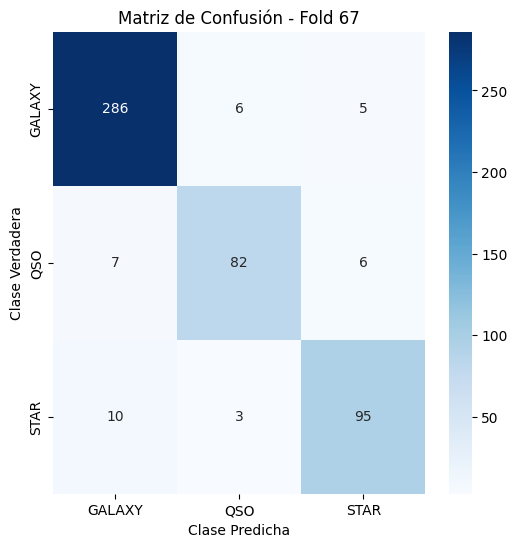

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 68:
[[285   2  10]
 [  5  85   5]
 [ 18   1  89]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       297
           1       0.97      0.89      0.93        95
           2       0.86      0.82      0.84       108

    accuracy                           0.92       500
   macro avg       0.92      0.89      0.90       500
weighted avg       0.92      0.92      0.92       500



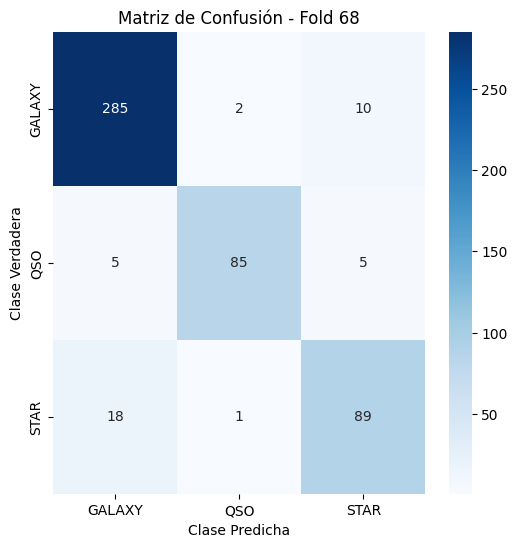

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 69:
[[291   1   5]
 [  2  91   2]
 [ 19   1  88]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       297
           1       0.98      0.96      0.97        95
           2       0.93      0.81      0.87       108

    accuracy                           0.94       500
   macro avg       0.95      0.92      0.93       500
weighted avg       0.94      0.94      0.94       500



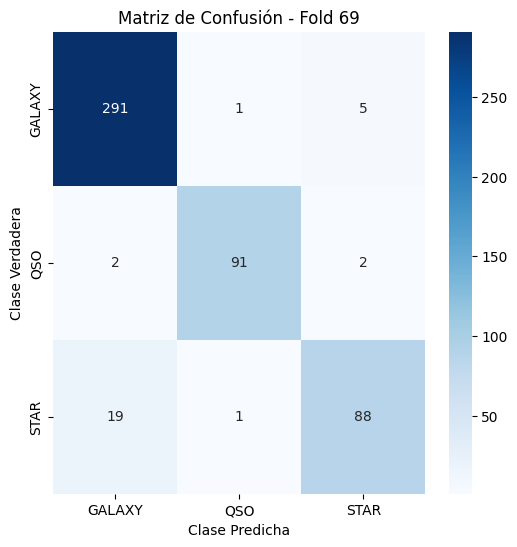

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 70:
[[279   0  18]
 [  8  83   4]
 [ 19   0  89]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       297
           1       1.00      0.87      0.93        95
           2       0.80      0.82      0.81       108

    accuracy                           0.90       500
   macro avg       0.90      0.88      0.89       500
weighted avg       0.90      0.90      0.90       500



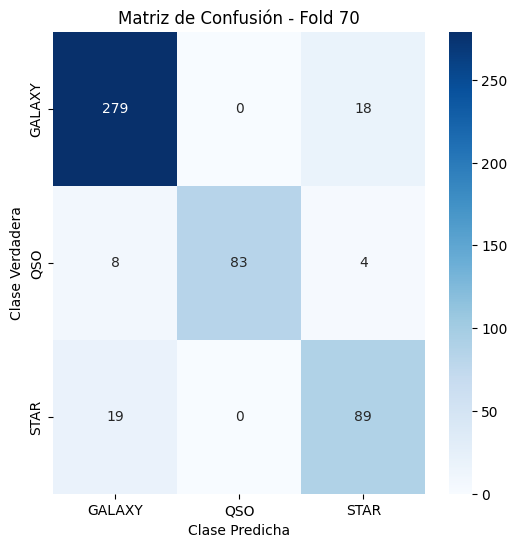

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Matriz de Confusión en el pliegue 71:
[[280   8   9]
 [  7  87   1]
 [ 20   1  87]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       297
           1       0.91      0.92      0.91        95
           2       0.90      0.81      0.85       108

    accuracy                           0.91       500
   macro avg       0.91      0.89      0.90       500
weighted avg       0.91      0.91      0.91       500



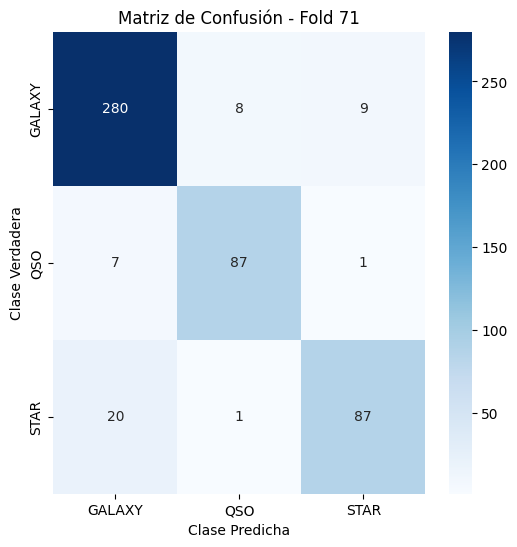

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 72:
[[285   3   9]
 [  6  86   3]
 [ 26   0  82]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       297
           1       0.97      0.91      0.93        95
           2       0.87      0.76      0.81       108

    accuracy                           0.91       500
   macro avg       0.91      0.87      0.89       500
weighted avg       0.91      0.91      0.90       500



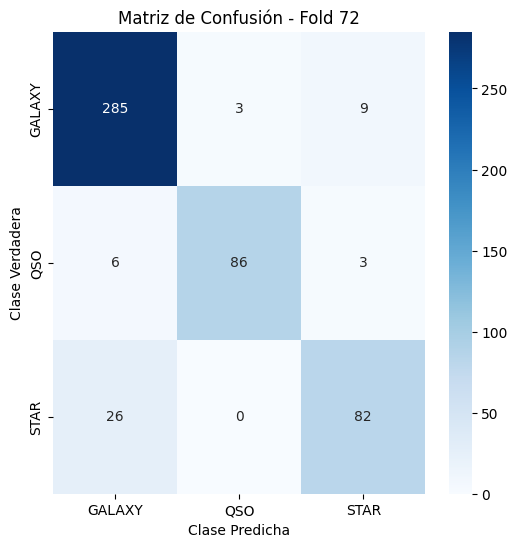

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 73:
[[280   2  15]
 [  6  87   2]
 [ 18   1  89]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       297
           1       0.97      0.92      0.94        95
           2       0.84      0.82      0.83       108

    accuracy                           0.91       500
   macro avg       0.91      0.89      0.90       500
weighted avg       0.91      0.91      0.91       500



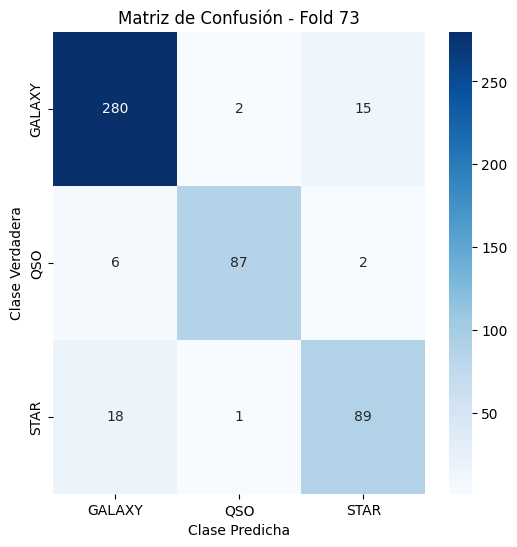

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 74:
[[283   4  10]
 [ 12  82   1]
 [ 25   0  83]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       297
           1       0.95      0.86      0.91        95
           2       0.88      0.77      0.82       108

    accuracy                           0.90       500
   macro avg       0.91      0.86      0.88       500
weighted avg       0.90      0.90      0.89       500



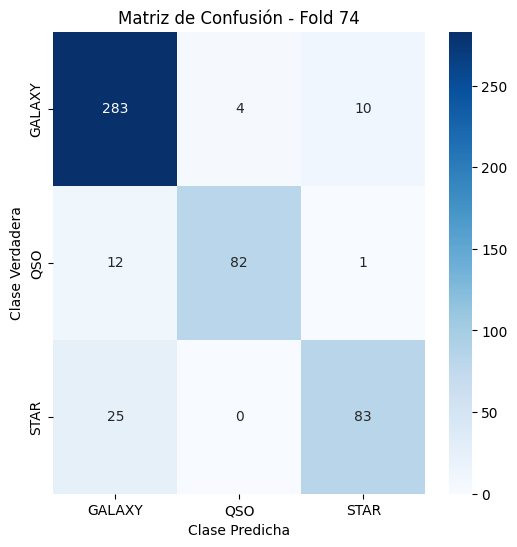

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 75:
[[289   2   6]
 [  3  91   1]
 [ 38   3  67]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       297
           1       0.95      0.96      0.95        95
           2       0.91      0.62      0.74       108

    accuracy                           0.89       500
   macro avg       0.91      0.85      0.87       500
weighted avg       0.90      0.89      0.89       500



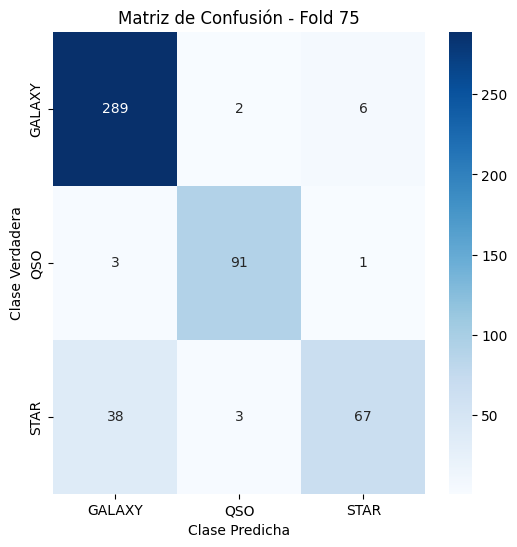

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de Confusión en el pliegue 76:
[[283   3  11]
 [  8  84   3]
 [ 20   4  84]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       297
           1       0.92      0.88      0.90        95
           2       0.86      0.78      0.82       108

    accuracy                           0.90       500
   macro avg       0.90      0.87      0.88       500
weighted avg       0.90      0.90      0.90       500



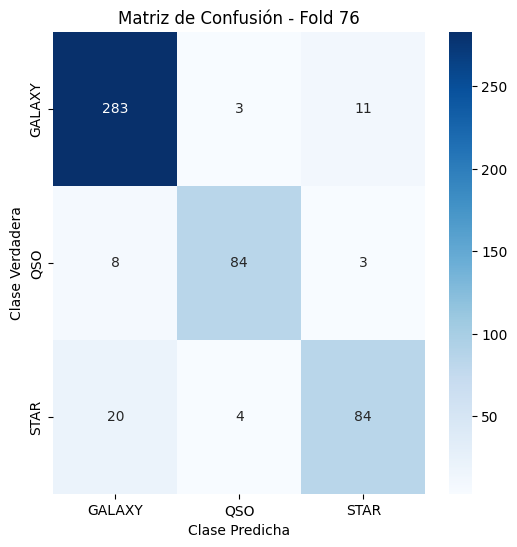

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 77:
[[285   2  10]
 [  8  85   2]
 [ 27   0  81]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       297
           1       0.98      0.89      0.93        95
           2       0.87      0.75      0.81       108

    accuracy                           0.90       500
   macro avg       0.91      0.87      0.89       500
weighted avg       0.90      0.90      0.90       500



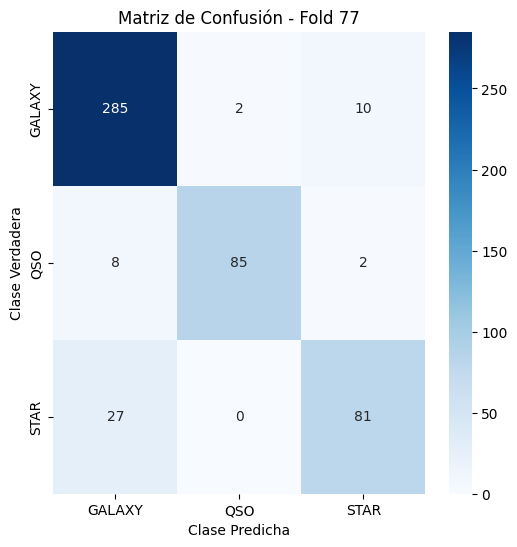

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 78:
[[285   2  10]
 [  6  84   5]
 [ 21   0  87]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       297
           1       0.98      0.88      0.93        95
           2       0.85      0.81      0.83       108

    accuracy                           0.91       500
   macro avg       0.91      0.88      0.90       500
weighted avg       0.91      0.91      0.91       500



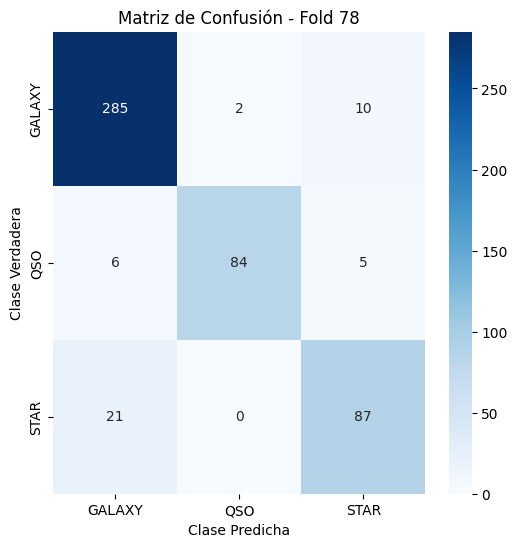

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 79:
[[288   3   6]
 [  5  87   3]
 [ 21   3  84]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       297
           1       0.94      0.92      0.93        95
           2       0.90      0.78      0.84       108

    accuracy                           0.92       500
   macro avg       0.92      0.89      0.90       500
weighted avg       0.92      0.92      0.92       500



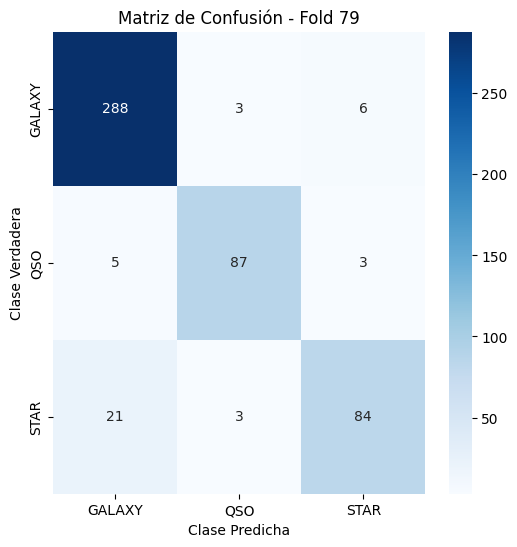

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 80:
[[283   4  10]
 [  2  89   4]
 [ 16   3  89]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       297
           1       0.93      0.94      0.93        95
           2       0.86      0.82      0.84       108

    accuracy                           0.92       500
   macro avg       0.91      0.90      0.91       500
weighted avg       0.92      0.92      0.92       500



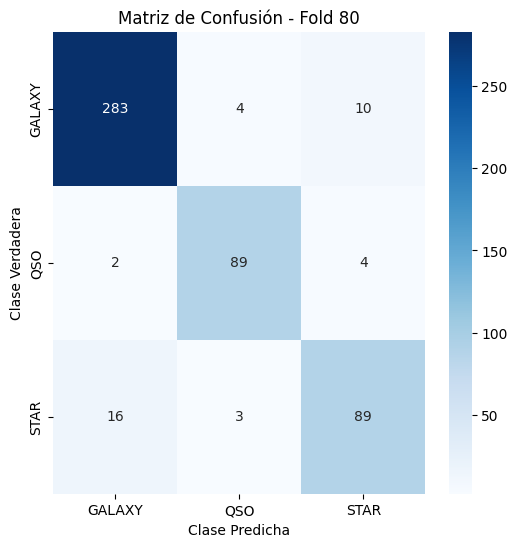

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de Confusión en el pliegue 81:
[[286   3   8]
 [  9  81   5]
 [ 21   1  86]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       297
           1       0.95      0.85      0.90        95
           2       0.87      0.80      0.83       108

    accuracy                           0.91       500
   macro avg       0.91      0.87      0.89       500
weighted avg       0.91      0.91      0.90       500



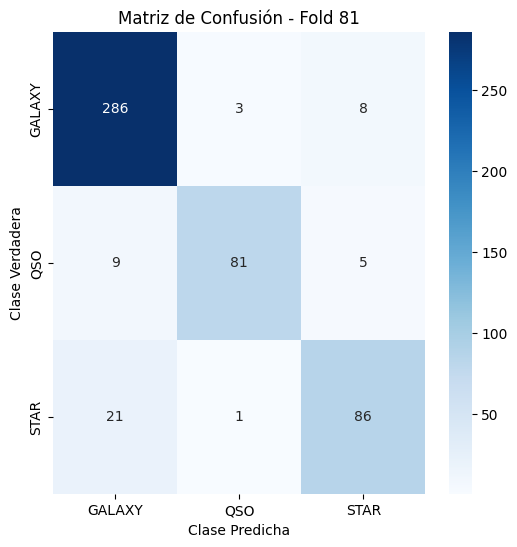

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 82:
[[287   2   8]
 [  6  84   5]
 [ 22   1  85]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       297
           1       0.97      0.88      0.92        95
           2       0.87      0.79      0.83       108

    accuracy                           0.91       500
   macro avg       0.91      0.88      0.90       500
weighted avg       0.91      0.91      0.91       500



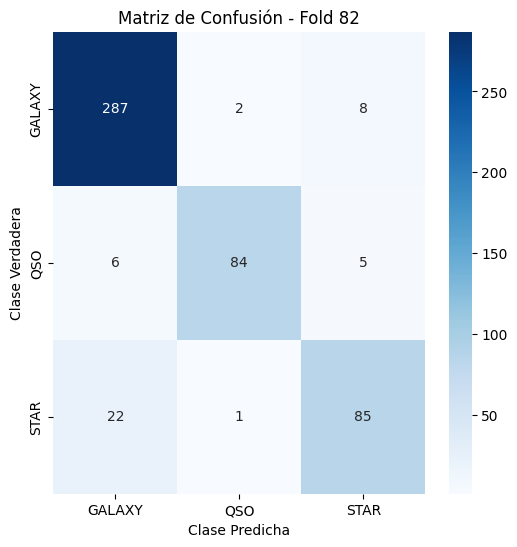

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 83:
[[281   2  14]
 [  6  85   4]
 [ 19   2  87]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       297
           1       0.96      0.89      0.92        95
           2       0.83      0.81      0.82       108

    accuracy                           0.91       500
   macro avg       0.90      0.88      0.89       500
weighted avg       0.91      0.91      0.91       500



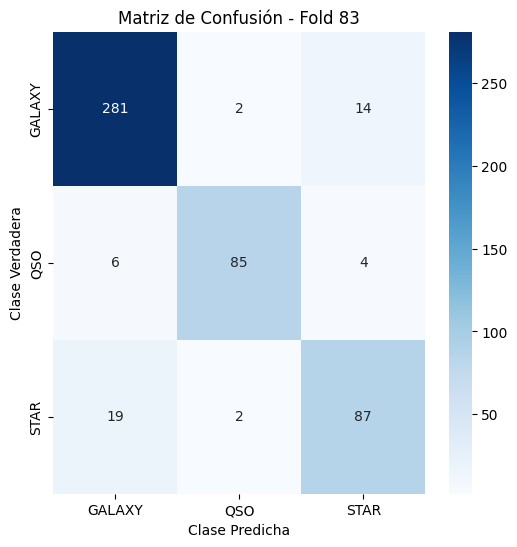

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 84:
[[270   3  24]
 [  5  86   4]
 [ 19   0  89]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       297
           1       0.97      0.91      0.93        95
           2       0.76      0.82      0.79       108

    accuracy                           0.89       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.89      0.89      0.89       500



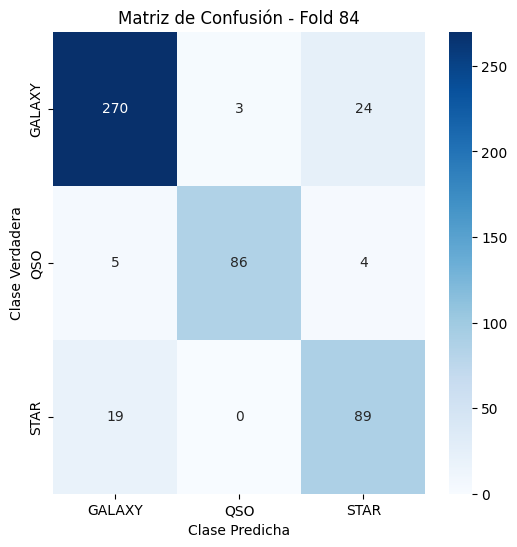

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de Confusión en el pliegue 85:
[[282   2  13]
 [  2  88   5]
 [ 22   3  83]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       297
           1       0.95      0.93      0.94        95
           2       0.82      0.77      0.79       108

    accuracy                           0.91       500
   macro avg       0.90      0.88      0.89       500
weighted avg       0.90      0.91      0.91       500



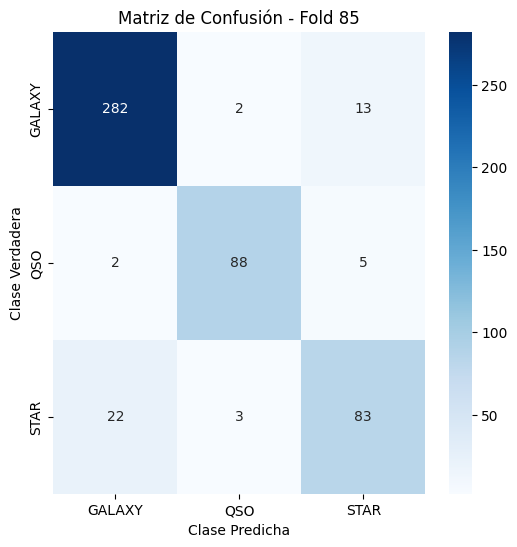

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 86:
[[273   5  19]
 [  6  84   5]
 [ 17   1  90]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       297
           1       0.93      0.88      0.91        95
           2       0.79      0.83      0.81       108

    accuracy                           0.89       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.90      0.89      0.89       500



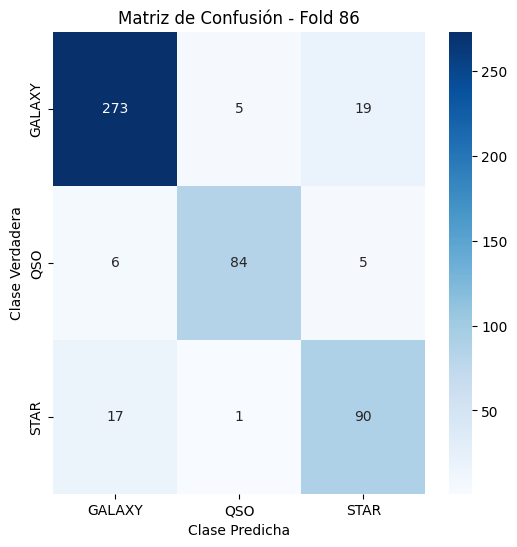

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 87:
[[287   2   8]
 [  8  83   4]
 [ 20   2  86]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       297
           1       0.95      0.87      0.91        95
           2       0.88      0.80      0.83       108

    accuracy                           0.91       500
   macro avg       0.91      0.88      0.89       500
weighted avg       0.91      0.91      0.91       500



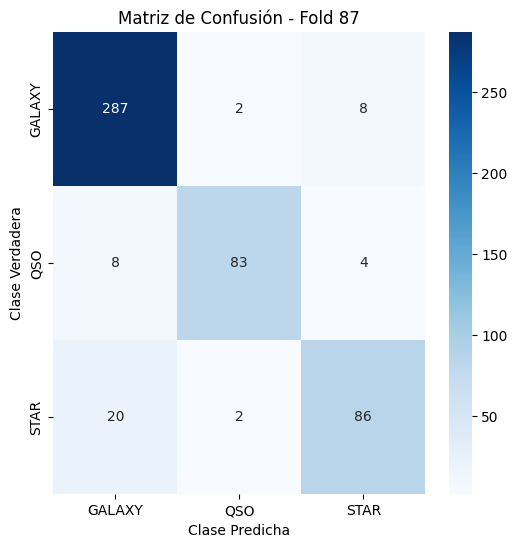

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 88:
[[288   3   6]
 [  6  88   1]
 [ 22   0  86]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       297
           1       0.97      0.93      0.95        95
           2       0.92      0.80      0.86       108

    accuracy                           0.92       500
   macro avg       0.93      0.90      0.91       500
weighted avg       0.92      0.92      0.92       500



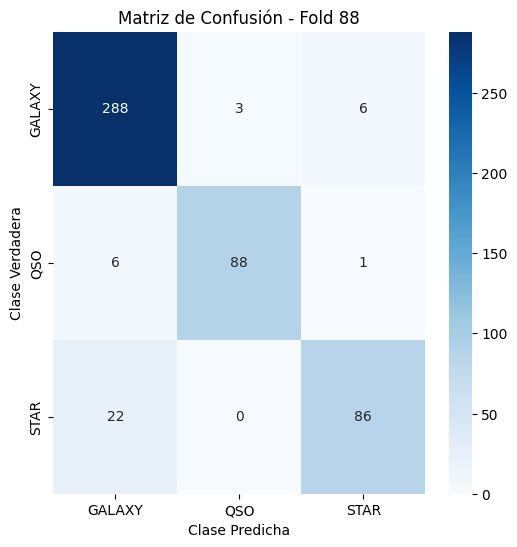

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 89:
[[284   3  10]
 [  7  86   2]
 [ 20   3  85]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       297
           1       0.93      0.91      0.92        95
           2       0.88      0.79      0.83       108

    accuracy                           0.91       500
   macro avg       0.91      0.88      0.89       500
weighted avg       0.91      0.91      0.91       500



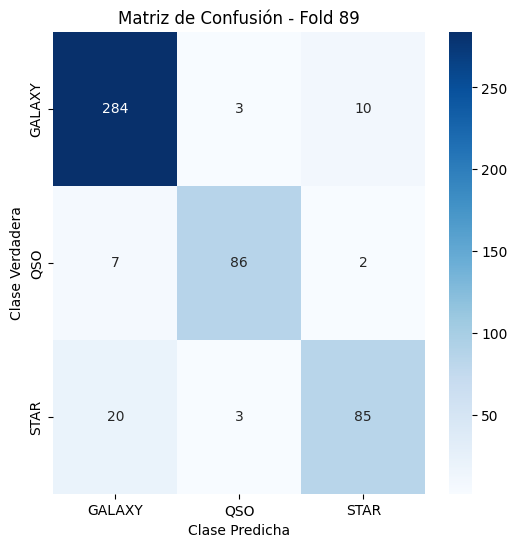

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 90:
[[280   3  14]
 [  7  86   2]
 [ 22   1  85]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       297
           1       0.96      0.91      0.93        95
           2       0.84      0.79      0.81       108

    accuracy                           0.90       500
   macro avg       0.90      0.88      0.89       500
weighted avg       0.90      0.90      0.90       500



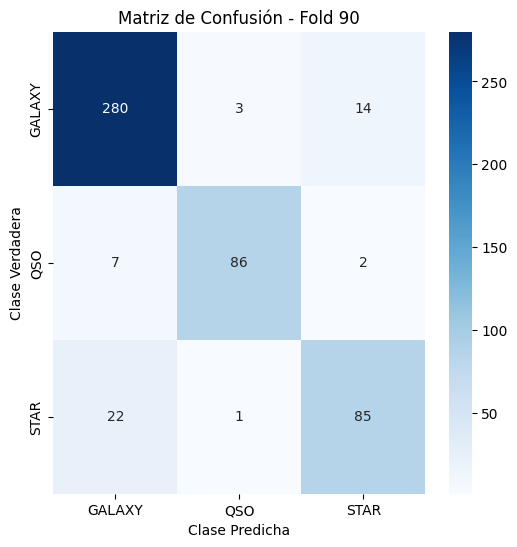

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 91:
[[289   2   6]
 [  9  84   2]
 [ 23   0  85]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       297
           1       0.98      0.88      0.93        95
           2       0.91      0.79      0.85       108

    accuracy                           0.92       500
   macro avg       0.93      0.88      0.90       500
weighted avg       0.92      0.92      0.91       500



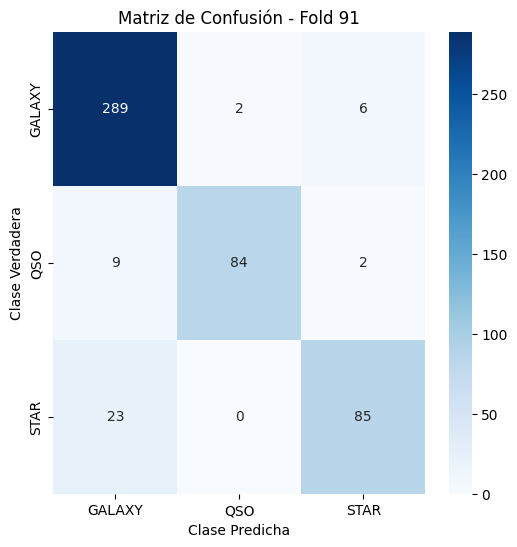

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 92:
[[283   6   8]
 [  2  89   4]
 [ 22   2  84]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       297
           1       0.92      0.94      0.93        95
           2       0.88      0.78      0.82       108

    accuracy                           0.91       500
   macro avg       0.90      0.89      0.90       500
weighted avg       0.91      0.91      0.91       500



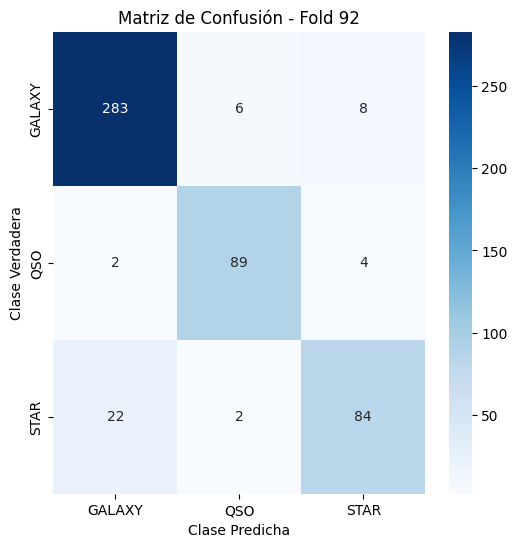

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 93:
[[290   3   4]
 [  9  82   4]
 [ 31   0  77]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       297
           1       0.96      0.86      0.91        95
           2       0.91      0.71      0.80       108

    accuracy                           0.90       500
   macro avg       0.92      0.85      0.88       500
weighted avg       0.90      0.90      0.89       500



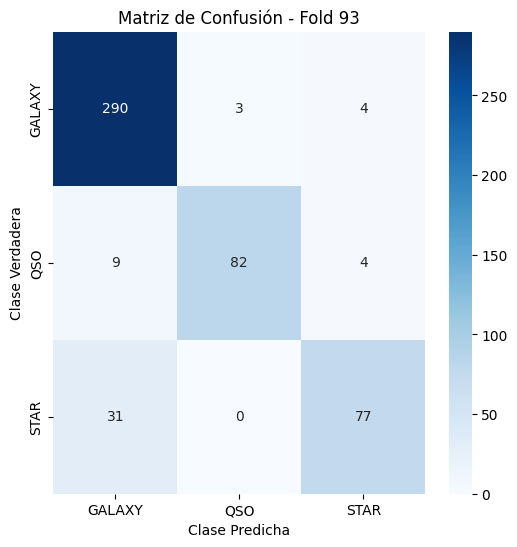

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 94:
[[271   7  19]
 [  3  85   7]
 [  9   2  97]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       297
           1       0.90      0.89      0.90        95
           2       0.79      0.90      0.84       108

    accuracy                           0.91       500
   macro avg       0.88      0.90      0.89       500
weighted avg       0.91      0.91      0.91       500



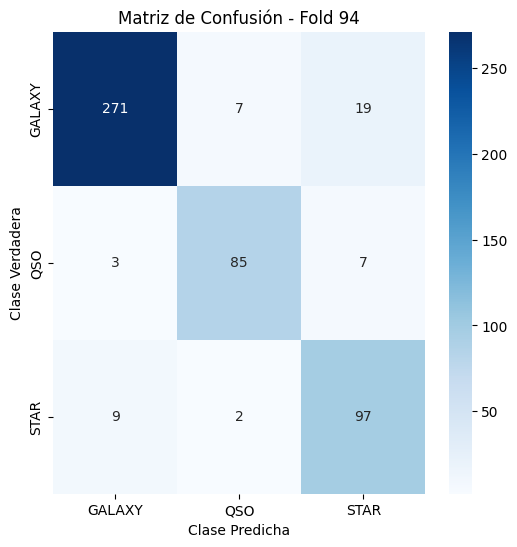

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 95:
[[290   0   7]
 [  7  87   1]
 [ 18   1  89]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       297
           1       0.99      0.92      0.95        95
           2       0.92      0.82      0.87       108

    accuracy                           0.93       500
   macro avg       0.94      0.91      0.92       500
weighted avg       0.93      0.93      0.93       500



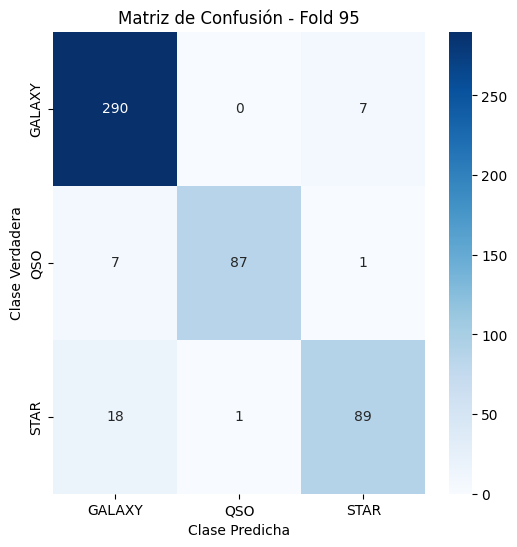

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 96:
[[290   1   6]
 [  4  89   2]
 [ 25   0  83]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       297
           1       0.99      0.94      0.96        95
           2       0.91      0.77      0.83       108

    accuracy                           0.92       500
   macro avg       0.94      0.89      0.91       500
weighted avg       0.92      0.92      0.92       500



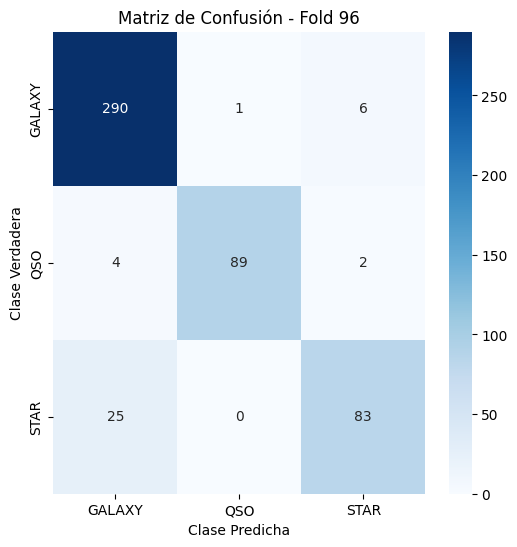

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 97:
[[285   2  10]
 [  3  84   8]
 [ 18   0  90]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       297
           1       0.98      0.88      0.93        95
           2       0.83      0.83      0.83       108

    accuracy                           0.92       500
   macro avg       0.91      0.89      0.90       500
weighted avg       0.92      0.92      0.92       500



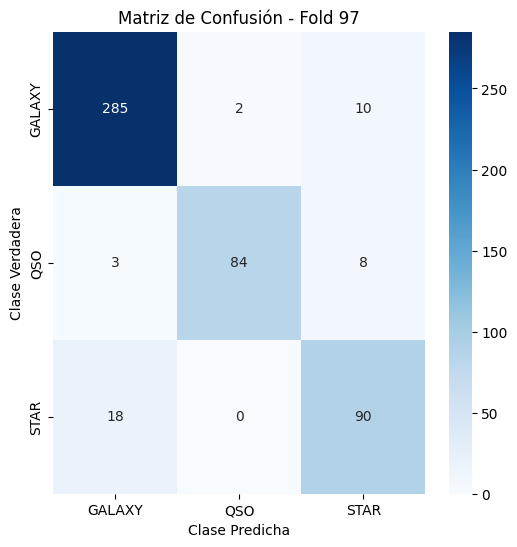

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de Confusión en el pliegue 98:
[[280   6  12]
 [  9  84   2]
 [ 22   0  85]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       298
           1       0.93      0.88      0.91        95
           2       0.86      0.79      0.83       107

    accuracy                           0.90       500
   macro avg       0.90      0.87      0.88       500
weighted avg       0.90      0.90      0.90       500



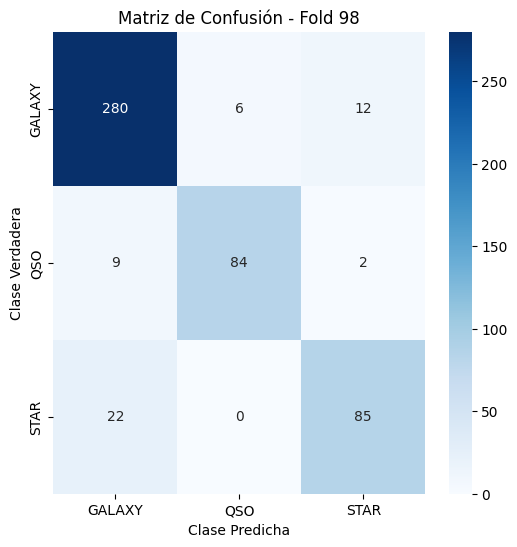

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Matriz de Confusión en el pliegue 99:
[[285   1  12]
 [  9  85   1]
 [ 20   0  87]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       298
           1       0.99      0.89      0.94        95
           2       0.87      0.81      0.84       107

    accuracy                           0.91       500
   macro avg       0.92      0.89      0.90       500
weighted avg       0.91      0.91      0.91       500



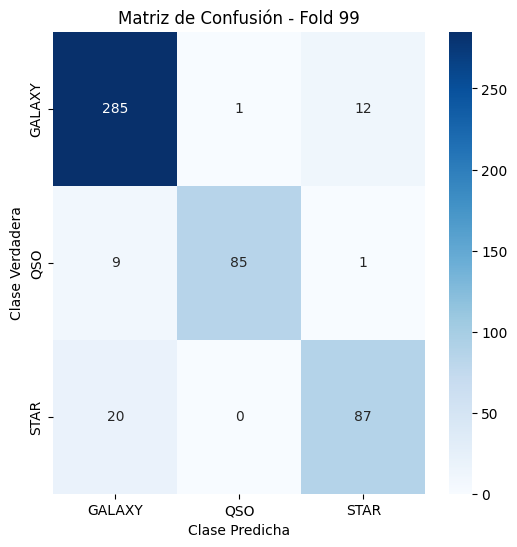

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Matriz de Confusión en el pliegue 100:
[[289   3   6]
 [ 11  82   2]
 [ 16   2  89]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       298
           1       0.94      0.86      0.90        95
           2       0.92      0.83      0.87       107

    accuracy                           0.92       500
   macro avg       0.92      0.89      0.91       500
weighted avg       0.92      0.92      0.92       500



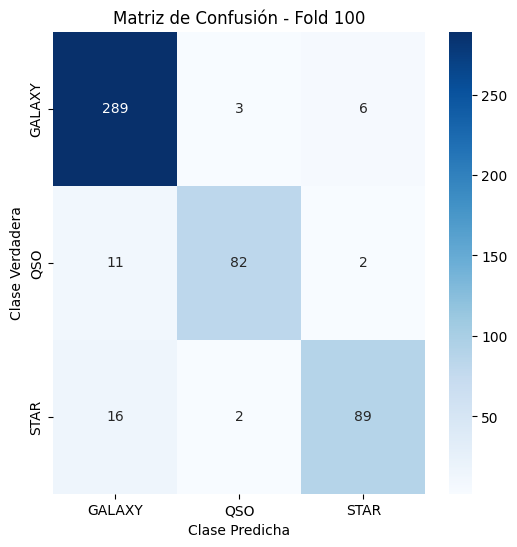


Mediana de la precisión en los 100 splits: 0.9020


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

df['target'] = data_cleaned[['class_GALAXY', 'class_QSO', 'class_STAR']].idxmax(axis=1).str.replace('class_', '')

X_pca = df_pca.to_numpy()
y = df['target']

# Binarizar las etiquetas (si es clasificación multiclase)
lb = LabelBinarizer()
y_binarized = lb.fit_transform(y)

# Dividir los datos en entrenamiento y prueba (50/50 para investigación)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_binarized, test_size=0.5, stratify=y, random_state=42)

# dividir el dataset en 100 partes
skf = StratifiedKFold(n_splits=100, shuffle=True, random_state=42)

# Listas para almacenar las precisiones de cada pliegue
accuracies = []

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Capa oculta 1
model.add(Dense(64, activation='relu'))  # Capa oculta 2
model.add(Dense(len(lb.classes_), activation='softmax'))  # Capa de salida con softmax

# Compilar el modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Realizar el K-Fold Cross Validation con 100 splits
for train_index, test_index in skf.split(X_train, np.argmax(y_train, axis=1)):  # Stratified por etiquetas originales
    # Dividir los datos en entrenamiento y validación para cada pliegue
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Entrenar el modelo en cada pliegue
    model.fit(X_train_fold, y_train_fold, epochs=1, batch_size=32, verbose=0)  # Puedes ajustar epochs según el tiempo disponible

    # Predecir las etiquetas para el conjunto de prueba
    y_pred = model.predict(X_test_fold)
    y_pred_classes = y_pred.argmax(axis=-1)  # Clases predichas
    y_test_classes = y_test_fold.argmax(axis=-1)  # Clases reales

    # Calcular precisión y almacenar
    accuracy = np.mean(y_pred_classes == y_test_classes)
    accuracies.append(accuracy)

    # Imprimir resultados por pliegue
    print(f"Matriz de Confusión en el pliegue {len(accuracies)}:")
    print(confusion_matrix(y_test_classes, y_pred_classes))

    print("\nReporte de Clasificación:")
    print(classification_report(y_test_classes, y_pred_classes))

    # Graficar la matriz de confusión
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix(y_test_classes, y_pred_classes), annot=True, fmt='d', cmap='Blues',
                xticklabels=lb.classes_, yticklabels=lb.classes_)
    plt.title(f'Matriz de Confusión - Fold {len(accuracies)}')
    plt.ylabel('Clase Verdadera')
    plt.xlabel('Clase Predicha')
    plt.show()

# Calcular la mediana de las precisiones
median_accuracy = np.median(accuracies)
print(f"\nMediana de la precisión en los {skf.get_n_splits()} splits: {median_accuracy:.4f}")


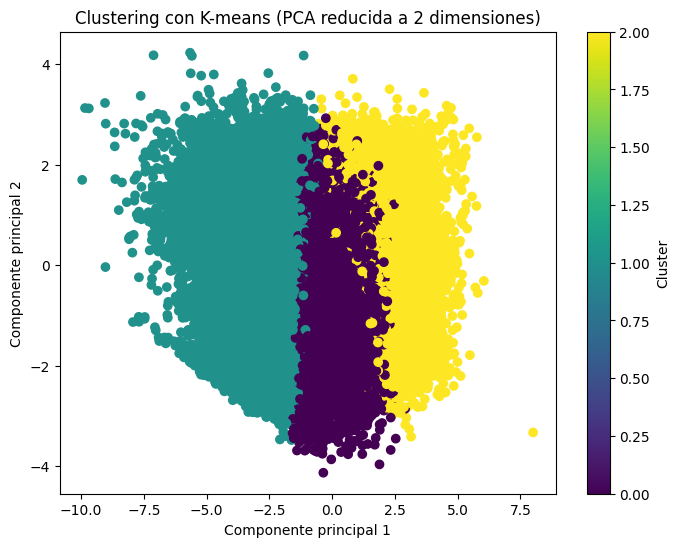

              PC1       PC2       PC3       PC4       PC5
Cluster                                                  
0        0.578685 -0.324675  0.392713  0.429042 -0.170625
1       -3.064279  0.077506 -0.099214 -0.126998  0.036883
2        2.451611  0.370096 -0.441840 -0.462931  0.198587


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Aplicamos K-means (elige el número de clusters, por ejemplo, 3)
kmeans = KMeans(n_clusters=3, random_state=42)  # Puedes cambiar el número de clusters según lo desees
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

# Visualizamos los resultados en un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=df_pca['Cluster'], cmap='viridis')
plt.title("Clustering con K-means (PCA reducida a 2 dimensiones)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.colorbar(label='Cluster')
plt.show()

# Si deseas ver las estadísticas de los clusters:
print(df_pca.groupby('Cluster').mean())
